# Trabalho 02 - Análise exploratória dos dados
## Este trabalho consiste na utilização de métodos estatísticos com a finalidade de explorar e extrair conhecimento do dataset gerado no trabalho anterior. 


## Universidade Federal do Ceará

**Nome:** Francisco Victor da Silva Pinheiro

**Matrícula:** 549789

**Disciplina:** CKP9011 - INTRODUÇÃO À CIÊNCIA DE DADOS

**Professor:** Dr. José Maria da Silva Monteiro Filho

### Sumário:
#### 1 - Descrição e importação do dataset
#### 2 - Análise exploratória dos dados
#### 2.1 - Medidas de Tendência Central 
#### 2.2 - Medidas de Variabilidade
#### 2.3 - Tabela de Frequência e Histograma 
#### 2.4 - Boxplot
#### 2.5 - QQ-Plot 
#### 2.6 - Correlações
#### 2.7 - Teste de Normalidade 
#### 2.8 - Best Fit Distribution

##  1 - Descrição e importação do dataset

### 1.1 - Descrição do site:

O ZAP é um portal de imóveis do Grupo OLX Brasil que reúne ofertas qualificadas, além de fotos, dicas e mapas para quem quer alugar, comprar ou vender. A sede fica na Vila Olímpia, em São Paulo, no entanto há escritórios por todo o Brasil.

### 1.2 - Tela inicial do site


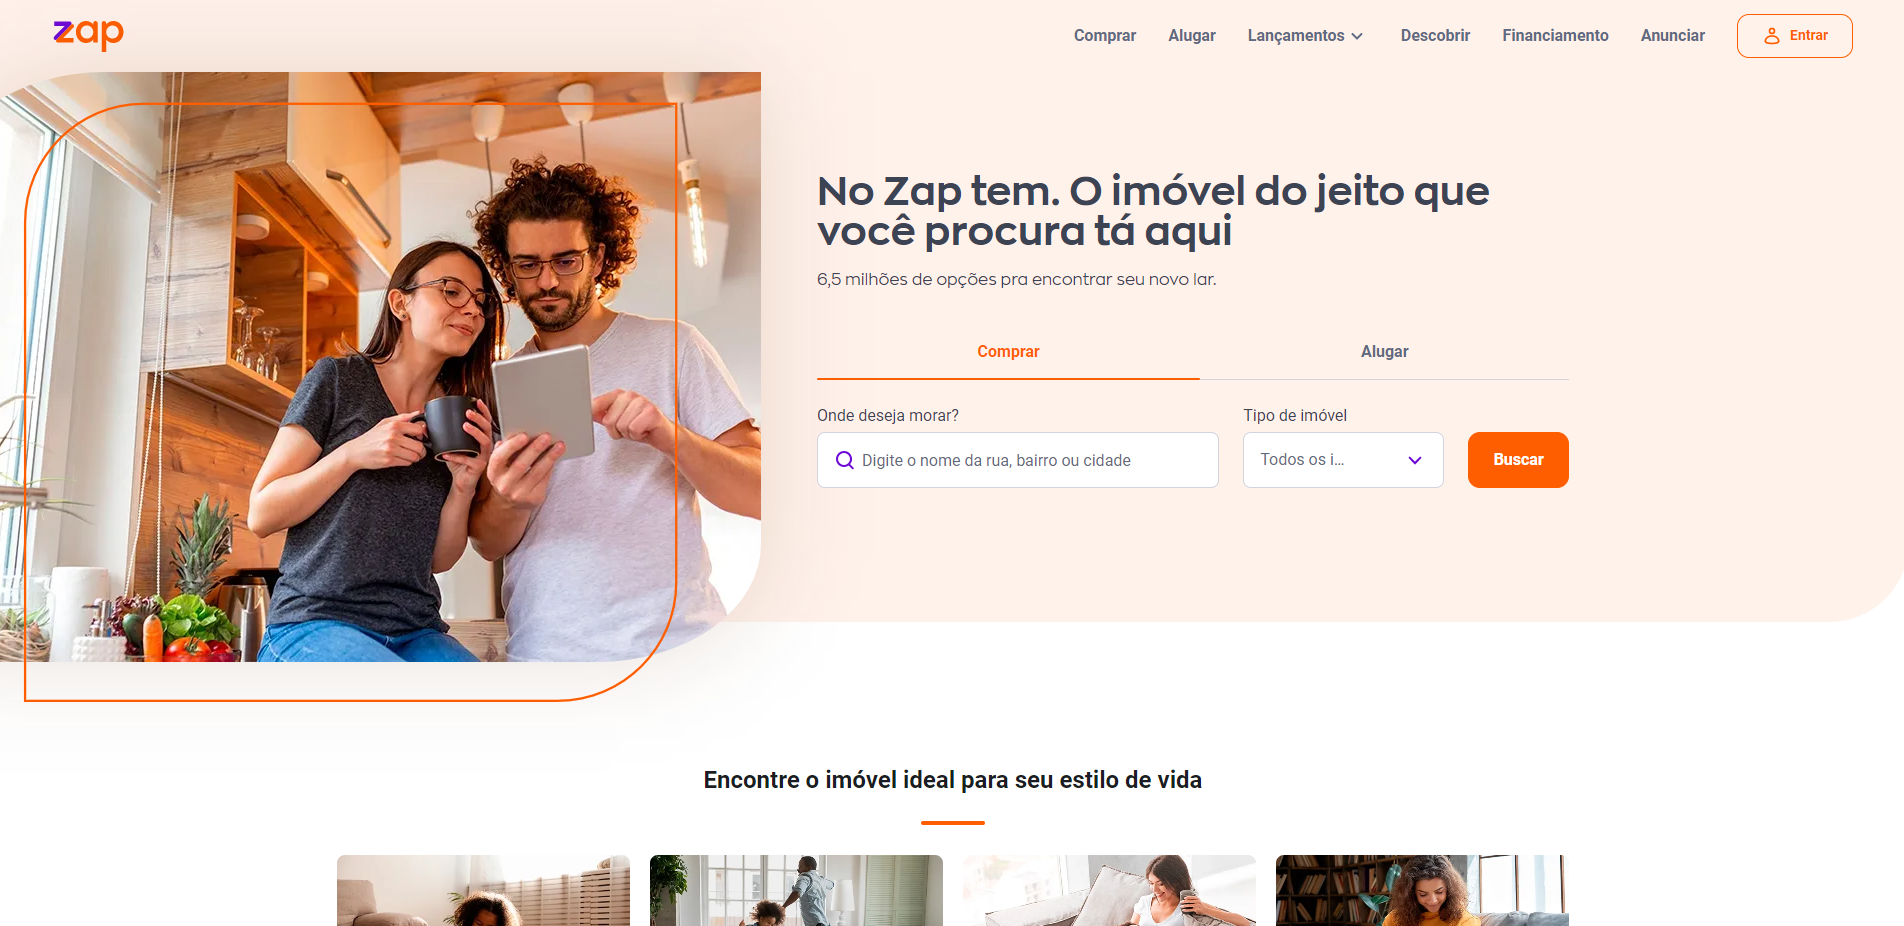

### 1.3 - Importação de bibliotecas:

In [1]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree, metrics
from plotnine import *
import statsmodels.api as sm
import scipy.stats as stats
import pylab as py

import warnings
warnings.filterwarnings('ignore')

### 1.3 - Importação do dataset:

In [3]:
df = pd.read_csv("ZapResult_final - ZapResult.csv")
df.head()

,aluguel,condominio,iptu,descricao,endereco,bairro,area,qtd_quartos,qtd_vagas,qtd_banheiros
0,2009,254,190,JÁ ESTAMOS RESERVANDO ENTREGA AGORA EM JUNHO g...,"Rua José Vilar, Dionísio Torres\n",Dionísio Torres,65.0,2.0,1.0,2.0
1,550,290,200,"Apartamento com 47 m², com 02 quartos, 01 banh...","Rua Florêncio Fontenele, Messejana\n",Messejana,47.0,2.0,1.0,1.0
2,750,250,198,"Excelente apartamento com 01 quarto, cozinha a...","Joaquim Tavora, Fortaleza\n",Cambeba,37.0,1.0,2.0,1.0
3,1300,254,900,O apartamento está localizado no bairro Planal...,"Rua José Alberto Pereira Pimentel, Planalto\n",Planalto,68.0,3.0,1.0,2.0
4,2200,600,75,O apartamento no bairro Centro possui 62 metro...,"Avenida Dom Manuel, Centro\n",Centro,62.0,2.0,1.0,2.0


##  2 - Análise exploratória dos dados

In [4]:
df.head(400)

,aluguel,condominio,iptu,descricao,endereco,bairro,area,qtd_quartos,qtd_vagas,qtd_banheiros
0,2009,254,190,JÁ ESTAMOS RESERVANDO ENTREGA AGORA EM JUNHO g...,"Rua José Vilar, Dionísio Torres\n",Dionísio Torres,65.0,2.0,1.0,2.0
1,550,290,200,"Apartamento com 47 m², com 02 quartos, 01 banh...","Rua Florêncio Fontenele, Messejana\n",Messejana,47.0,2.0,1.0,1.0
2,750,250,198,"Excelente apartamento com 01 quarto, cozinha a...","Joaquim Tavora, Fortaleza\n",Cambeba,37.0,1.0,2.0,1.0
3,1300,254,900,O apartamento está localizado no bairro Planal...,"Rua José Alberto Pereira Pimentel, Planalto\n",Planalto,68.0,3.0,1.0,2.0
4,2200,600,75,O apartamento no bairro Centro possui 62 metro...,"Avenida Dom Manuel, Centro\n",Centro,62.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
395,1609,550,1,O apartamento está localizado no bairro Aldeot...,"Rua Bárbara de Alencar, Aldeota\n",Praia do Futuro I,50.0,2.0,1.0,1.0
396,200,250,390,"APARTAMENTO MOBILIADO, VISTA MAR, LOCALIZADO N...","Avenida Historiador Raimundo Girão, Praia de ...",Papicu,70.0,2.0,1.0,2.0
397,1400,250,0,O apartamento está localizado no bairro Praia ...,"Rua Francisco Moreira, Praia do Futuro I\n",Aldeota,45.0,1.0,1.0,1.0
398,1100,250,0,O apartamento está localizado no bairro Papicu...,"Rua Riachuelo, Papicu\n",Cidade dos Funcionários,100.0,3.0,1.0,3.0


#### Verificando número de instâncias e atributos do dataset

In [5]:
print("Número de instâncias: " + str(df.shape[0]))
print("Número de atributos: " + str(df.shape[1]))

Número de instâncias: 4690
Número de atributos: 10


#### Verificando valores nulos

In [6]:
print("Número de valores nulos:")
df.isna().sum()

Número de valores nulos:


aluguel            0
condominio         0
iptu               0
descricao          3
endereco           2
bairro            16
area              42
qtd_quartos        2
qtd_vagas        704
qtd_banheiros      3
dtype: int64

#### Bairros que mais se repetem

In [7]:
df['bairro'].value_counts()

Cambeba                    474
Meireles                   439
Centro                     251
Passaré                    184
Aldeota                    173
                          ... 
Alagadiço Novo               1
Cigana                       1
Cágado                       1
Pecém                        1
Nossa Senhora de Fatima      1
Name: bairro, Length: 195, dtype: int64

#### Valor de aluguel que mais se repete

In [8]:
df['aluguel'].value_counts()

1000    200
1200    199
900     184
1100    183
700     166
       ... 
975       1
1520      1
1049      1
3084      1
9000      1
Name: aluguel, Length: 270, dtype: int64

#### Quantidade de imóveis por bairro

In [12]:
print("Quantidade de imóveis por bairro:")

# bairros = ['Aldeota', 'Meireles', 'Mucuripe', 'Cocó', 'Papicu', 'Dionísio Torres', 'Benfica', 'Montese', 'Parquelândia', 'Maraponga', 'Barra do Ceará', 'Vila União', 'Joaquim Távora', 'Jacarecanga', 'Centro', 'Fátima', 'Varjota', 'Praia de Iracema', 'Antônio Bezerra', 'Edson Queiroz', 'Parreão', 'Praia do Futuro I', 'Cidade dos Funcionários', 'Alagadiço Novo', 'Cágado']

bairros = df['bairro'].unique()

quantidades = [(bairro, df.loc[df['bairro'] == bairro]['aluguel'].count()) for bairro in bairros]
quantidades_ordenadas = sorted(quantidades, key=lambda x: x[1], reverse=True)
for bairro, quantidade in quantidades_ordenadas:
    print(f"{bairro}: {quantidade}")

Quantidade de imóveis por bairro:
Cambeba: 474
Meireles: 439
Centro: 251
Passaré: 184
Aldeota: 173
Messejana: 122
Joaquim Tavora: 115
Porto das Dunas: 114
Praia de Iracema: 112
Papicu: 99
Parangaba: 98
Mucuripe: 93
Cocó: 91
Montese: 87
Edson Queiroz: 87
Benfica: 79
Maraponga: 76
Parque Iracema: 67
Cumbuco: 66
Fátima: 64
Parquelândia: 62
Engenheiro Luciano Cavalcante: 61
Jacarecanga: 51
Coacu: 51
Dionísio Torres: 46
Guararapes: 46
Presidente Kennedy: 41
Sao Gerardo: 41
Tabapuã: 41
Eusébio: 41
Mondubim: 39
Monte Castelo: 38
Varjota: 38
Aquiraz: 36
Praia do Futuro II: 33
Vila União: 29
Caucaia: 27
Itaperi: 27
Cidade dos Funcionários: 27
Parque Dois Irmãos: 26
Paupina: 26
Damas: 24
Jangurussu: 24
Barra do Ceará: 22
Pici: 21
Manuel Sátiro: 21
Rodolfo Teófilo: 21
José Bonifácio: 21
Prefeito José Walter: 20
Lagoa Seca: 19
Antônio Bezerra: 19
Icarai: 19
Cajazeiras: 18
Tamatanduba: 18
Maracanaú: 18
Sapiranga: 17
Vicente Pinzon: 16
Álvaro Weyne: 16
Lagoa Redonda: 16
Cidade 2000: 15
JOSE DE ALENC

#### Informações gerais sobre os atributos do dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   aluguel        4690 non-null   int64  
 1   condominio     4690 non-null   int64  
 2   iptu           4690 non-null   int64  
 3   descricao      4687 non-null   object 
 4   endereco       4688 non-null   object 
 5   bairro         4674 non-null   object 
 6   area           4648 non-null   float64
 7   qtd_quartos    4688 non-null   float64
 8   qtd_vagas      3986 non-null   float64
 9   qtd_banheiros  4687 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 366.5+ KB


### 2.1 - Medidas de Tendência Central 

#### Quantidade, média, desvio padrão, valor mínimo e máximo pra cada feature

In [75]:
df.describe()

,aluguel,condominio,iptu,area,qtd_quartos,qtd_vagas,qtd_banheiros
count,4690.000000,4690.000000,4690.000000,4648.000000,4688.000000,3986.000000,4687.000000
mean,1811.712367,418.791258,387.414925,69.129303,2.255546,1.356749,1.949221
std,12448.364885,345.240073,440.138087,70.241523,0.682910,0.598766,1.038310
min,120.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000
25%,850.000000,200.000000,66.000000,50.000000,2.000000,1.000000,1.000000
50%,1200.000000,353.000000,293.000000,61.000000,2.000000,1.000000,2.000000
75%,2239.750000,600.000000,550.000000,75.000000,3.000000,2.000000,2.000000
max,850000.000000,2800.000000,8761.000000,4365.000000,8.000000,12.000000,11.000000


#### Média dos preços dos aluguéis por bairro

In [14]:
print("Média dos preços dos aluguéis por bairro:")

# bairros = ['Aldeota', 'Meireles', 'Mucuripe', 'Cocó', 'Papicu', 'Dionísio Torres', 'Benfica', 'Montese', 'Parquelândia', 'Maraponga', 'Barra do Ceará', 'Vila União', 'Joaquim Távora', 'Jacarecanga', 'Centro', 'Fátima', 'Varjota', 'Praia de Iracema', 'Antônio Bezerra', 'Edson Queiroz', 'Parreão', 'Praia do Futuro I', 'Cidade dos Funcionários']

bairros = df['bairro'].unique()
for bairro in bairros:
    print(f"{bairro}:", df.loc[df['bairro'] == bairro]['aluguel'].mean())

Média dos preços dos aluguéis por bairro:
Dionísio Torres: 1653.1739130434783
Messejana: 1476.8196721311476
Cambeba: 1578.350210970464
Planalto: 1978.7777777777778
Centro: 1642.1713147410358
Curicaca: 1816.6666666666667
Presidente Kennedy: 1657.878048780488
Meireles: 1690.1731207289295
Cumbuco: 1437.3939393939395
Monte Castelo: 1371.5526315789473
Parangaba: 10065.224489795919
Tauape: 1569.2857142857142
Parquelândia: 1741.483870967742
Parque Iracema: 1728.7014925373135
Benfica: 1543.012658227848
Joaquim Tavora: 1595.9304347826087
Sao Gerardo: 1652.9268292682927
Parque Dois Irmãos: 1264.6153846153845
Jardim Gonzaga: 1912.2307692307693
Passaré: 1515.679347826087
Mucuripe: 1574.9354838709678
Aldeota: 1637.849710982659
Praia de Iracema: 1962.0357142857142
Amontada: 1568.75
Fátima: 2000.578125
Barra do Ceará: 1637.2272727272727
Montese: 1572.2643678160919
Caucaia: 1780.7407407407406
Damas: 2201.2083333333335
Cocó: 1667.7032967032967
Pici: 1748.047619047619
Varjota: 1725.2368421052631
Papicu:

#### Mediana dos preços dos aluguéis por bairro

In [16]:
print("Mediana dos preços dos aluguéis por bairro:")

# bairros = ['Aldeota', 'Meireles', 'Mucuripe', 'Cocó', 'Papicu', 'Dionísio Torres', 'Benfica', 'Montese', 'Parquelândia', 'Maraponga', 'Barra do Ceará', 'Vila União', 'Joaquim Távora', 'Jacarecanga', 'Centro', 'Fátima', 'Varjota', 'Praia de Iracema', 'Antônio Bezerra', 'Edson Queiroz', 'Parreão', 'Praia do Futuro I', 'Cidade dos Funcionários', 'Alagadiço Novo', 'Cágado']

bairros = df['bairro'].unique()
for bairro in bairros:
    print(f"{bairro}:", df.loc[df['bairro'] == bairro]['aluguel'].median())

Mediana dos preços dos aluguéis por bairro:
Dionísio Torres: 1300.0
Messejana: 1100.0
Cambeba: 1200.0
Planalto: 1409.0
Centro: 1300.0
Curicaca: 1200.0
Presidente Kennedy: 1550.0
Meireles: 1200.0
Cumbuco: 975.0
Monte Castelo: 1150.0
Parangaba: 1200.0
Tauape: 1450.0
Parquelândia: 1300.0
Parque Iracema: 1600.0
Benfica: 1200.0
Joaquim Tavora: 1300.0
Sao Gerardo: 1500.0
Parque Dois Irmãos: 1100.0
Jardim Gonzaga: 1700.0
Passaré: 1200.0
Mucuripe: 1200.0
Aldeota: 1200.0
Praia de Iracema: 1313.5
Amontada: 1600.0
Fátima: 1625.0
Barra do Ceará: 1100.0
Montese: 1300.0
Caucaia: 1600.0
Damas: 2154.5
Cocó: 1400.0
Pici: 1500.0
Varjota: 1475.0
Papicu: 1200.0
Jacarecanga: 1300.0
Engenheiro Luciano Cavalcante: 1200.0
Praia do Futuro II: 1300.0
Tabapuã: 905.0
Lagoa Seca: 1300.0
Cajazeiras: 979.5
Eusebio: 1020.0
Edson Queiroz: 1300.0
Itaperi: 1200.0
Porto das Dunas: 1504.5
Coacu: 1000.0
Planalto Ayrton Senna: 1400.0
Sapiranga: 1250.0
Guararapes: 1300.0
Jangurussu: 1150.0
Manuel Sátiro: 1100.0
Sitio Sao Joa

#### Desvio padrão dos preços dos aluguéis por bairro

In [17]:
print("Desvio padrão dos preços dos aluguéis por bairro:")

# bairros = ['Aldeota', 'Meireles', 'Mucuripe', 'Cocó', 'Papicu', 'Dionísio Torres', 'Benfica', 'Montese', 'Parquelândia', 'Maraponga', 'Barra do Ceará', 'Vila União', 'Joaquim Távora', 'Jacarecanga', 'Centro', 'Fátima', 'Varjota', 'Praia de Iracema', 'Antônio Bezerra', 'Edson Queiroz', 'Parreão', 'Praia do Futuro I', 'Cidade dos Funcionários']

bairros = df['bairro'].unique()
for bairro in bairros:
    print(f"{bairro}:", df.loc[df['bairro'] == bairro]['aluguel'].std())

Desvio padrão dos preços dos aluguéis por bairro:
Dionísio Torres: 1123.1942605177003
Messejana: 983.9844117591578
Cambeba: 1022.7370253248658
Planalto: 1365.8892504315438
Centro: 1170.69204086039
Curicaca: 1695.3981833185971
Presidente Kennedy: 924.275965151154
Meireles: 1303.3664725400938
Cumbuco: 1125.8557344224591
Monte Castelo: 791.2772670633638
Parangaba: 85724.40181432186
Tauape: 842.9112945912225
Parquelândia: 1264.855278988379
Parque Iracema: 827.7570463155307
Benfica: 969.6717987410033
Joaquim Tavora: 1070.4511077417776
Sao Gerardo: 975.7054983509088
Parque Dois Irmãos: 782.8063912321144
Jardim Gonzaga: 1454.9351734611266
Passaré: 995.9769679385422
Mucuripe: 1034.5166252730496
Aldeota: 1254.5172380392812
Praia de Iracema: 2557.3109466766614
Amontada: 652.9808026055808
Fátima: 1380.8134686008261
Barra do Ceará: 1263.0034472606192
Montese: 1165.1103696573239
Caucaia: 944.6720062700065
Damas: 1687.6005085473503
Cocó: 1043.2282640865376
Pici: 981.7586503917587
Varjota: 1279.99555

#### Valor médio dos  valores de aluguéis, condominio e iptu

In [79]:
aluguel_valor = df['aluguel'].mean()
print("Média do valor do aluguel:", aluguel_valor)

condominio_valor = df['condominio'].mean()
print("Média do valor do condominio:", condominio_valor)

iptu_valor = df['iptu'].mean()
print("Média do valor do IPTU:", iptu_valor)

Média do valor do aluguel: 1811.7123667377398
Média do valor do condominio: 418.79125799573563
Média do valor do IPTU: 387.41492537313434


### 2.2 - Medidas de Variabilidade:

#### Calculando o Desvio

In [80]:
d = df['aluguel'].apply(lambda x: x - aluguel_valor)
d

0        197.287633
1      -1261.712367
2      -1061.712367
3       -511.712367
4        388.287633
           ...     
4685   -1411.712367
4686    3188.287633
4687   -1211.712367
4688    -611.712367
4689    -111.712367
Name: aluguel, Length: 4690, dtype: float64

In [81]:
d.mean()

-1.2411015120142304e-14

#### Desvio Absoluto Médio (ou Média do Desvio Absoluto)

In [82]:
df['aluguel'].mad()

1121.016590304645

In [83]:
df['condominio'].mad()

261.58389823650555

In [84]:
df['iptu'].mad()

325.3422333959202

#### Variância

In [85]:
df['aluguel'].var()

154961788.31328297

In [86]:
df['condominio'].var()

119190.7081769206

In [87]:
df['iptu'].var()

193721.53520052455

#### Desvio Padrão

In [88]:
df['aluguel'].std()

12448.364885127805

In [89]:
df['condominio'].std()

345.24007324892136

In [90]:
df['iptu'].std()

440.1380865143626

### 2.3 - Tabelas de Frequência e Histogramas:

#### Distribuição das features

#### Distribuição dos valores dos alugueis em faixas de 500 reais

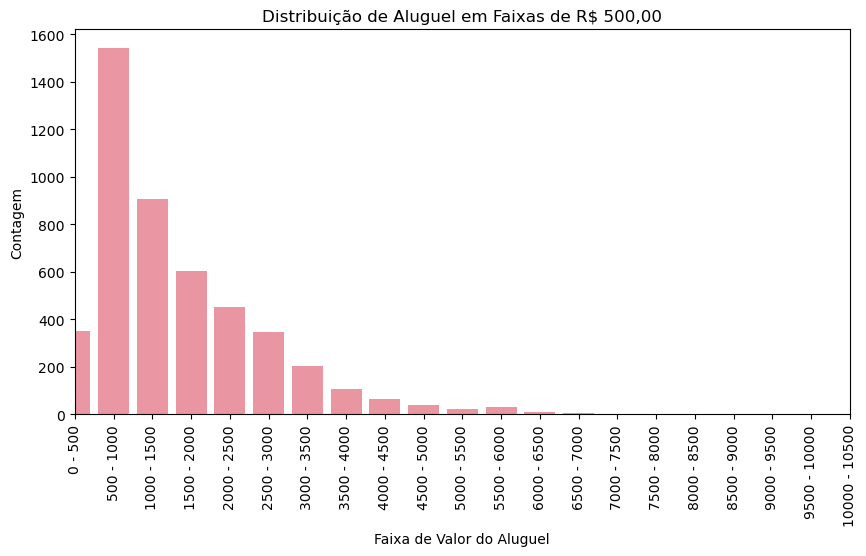

In [92]:
# Agrupando os valores do aluguel em intervalos de 500 em 500 reais
intervalos = range(0, int(df["aluguel"].max()), 500)
labels = ["{} - {}".format(i, i + 500) for i in intervalos[:-1]]
df["aluguel_intervalo"] = pd.cut(df["aluguel"], bins=intervalos, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 5))
sns.countplot(x=df["aluguel_intervalo"])
plt.xlabel("Faixa de Valor do Aluguel")
plt.ylabel("Contagem")
plt.title("Distribuição de Aluguel em Faixas de R$ 500,00")
plt.xticks(rotation=90)
plt.xlim(0, 20)
plt.show()

#### Distribuição dos valores do conominio em faixas de 500 reais

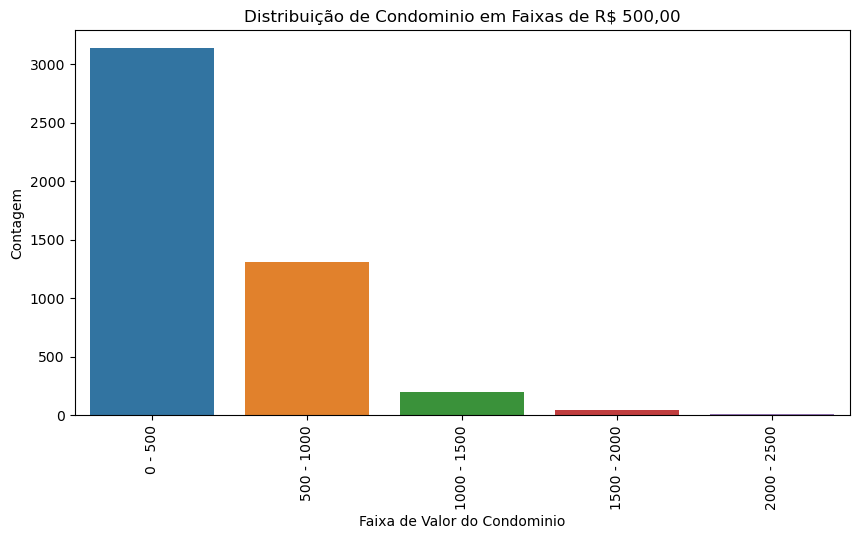

In [93]:
intervalos = range(0, int(df["condominio"].max()), 500)
labels = ["{} - {}".format(i, i + 500) for i in intervalos[:-1]]
df["condominio_intervalo"] = pd.cut(df["condominio"], bins=intervalos, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 5))
sns.countplot(x=df["condominio_intervalo"])
plt.xlabel("Faixa de Valor do Condominio")
plt.ylabel("Contagem")
plt.title("Distribuição de Condominio em Faixas de R$ 500,00")
plt.xticks(rotation=90)
plt.show()

#### Distribuição dos valores do IPTU em faixas de 500 reais

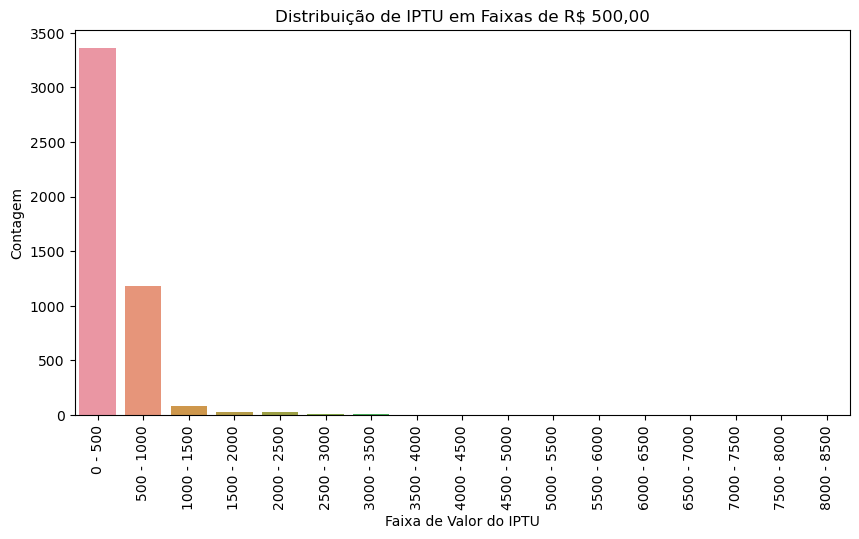

In [94]:
intervalos = range(0, int(df["iptu"].max()), 500)
labels = ["{} - {}".format(i, i + 500) for i in intervalos[:-1]]
df["iptu_intervalo"] = pd.cut(df["iptu"], bins=intervalos, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 5))
sns.countplot(x=df["iptu_intervalo"])
plt.xlabel("Faixa de Valor do IPTU")
plt.ylabel("Contagem")
plt.title("Distribuição de IPTU em Faixas de R$ 500,00")
plt.xticks(rotation=90)
plt.show()

#### Quantidade de apartamentos por bairro 

In [95]:
df['bairro'].value_counts()

Cambeba                    474
Meireles                   439
Centro                     251
Passaré                    184
Aldeota                    173
                          ... 
Alagadiço Novo               1
Cigana                       1
Cágado                       1
Pecém                        1
Nossa Senhora de Fatima      1
Name: bairro, Length: 195, dtype: int64

#### Proporção de bairros no dataset

In [96]:
print(df["bairro"].value_counts() / len(df))

Cambeba                    0.101066
Meireles                   0.093603
Centro                     0.053518
Passaré                    0.039232
Aldeota                    0.036887
                             ...   
Alagadiço Novo             0.000213
Cigana                     0.000213
Cágado                     0.000213
Pecém                      0.000213
Nossa Senhora de Fatima    0.000213
Name: bairro, Length: 195, dtype: float64


#### Quais os bairros que mais tem no dataset

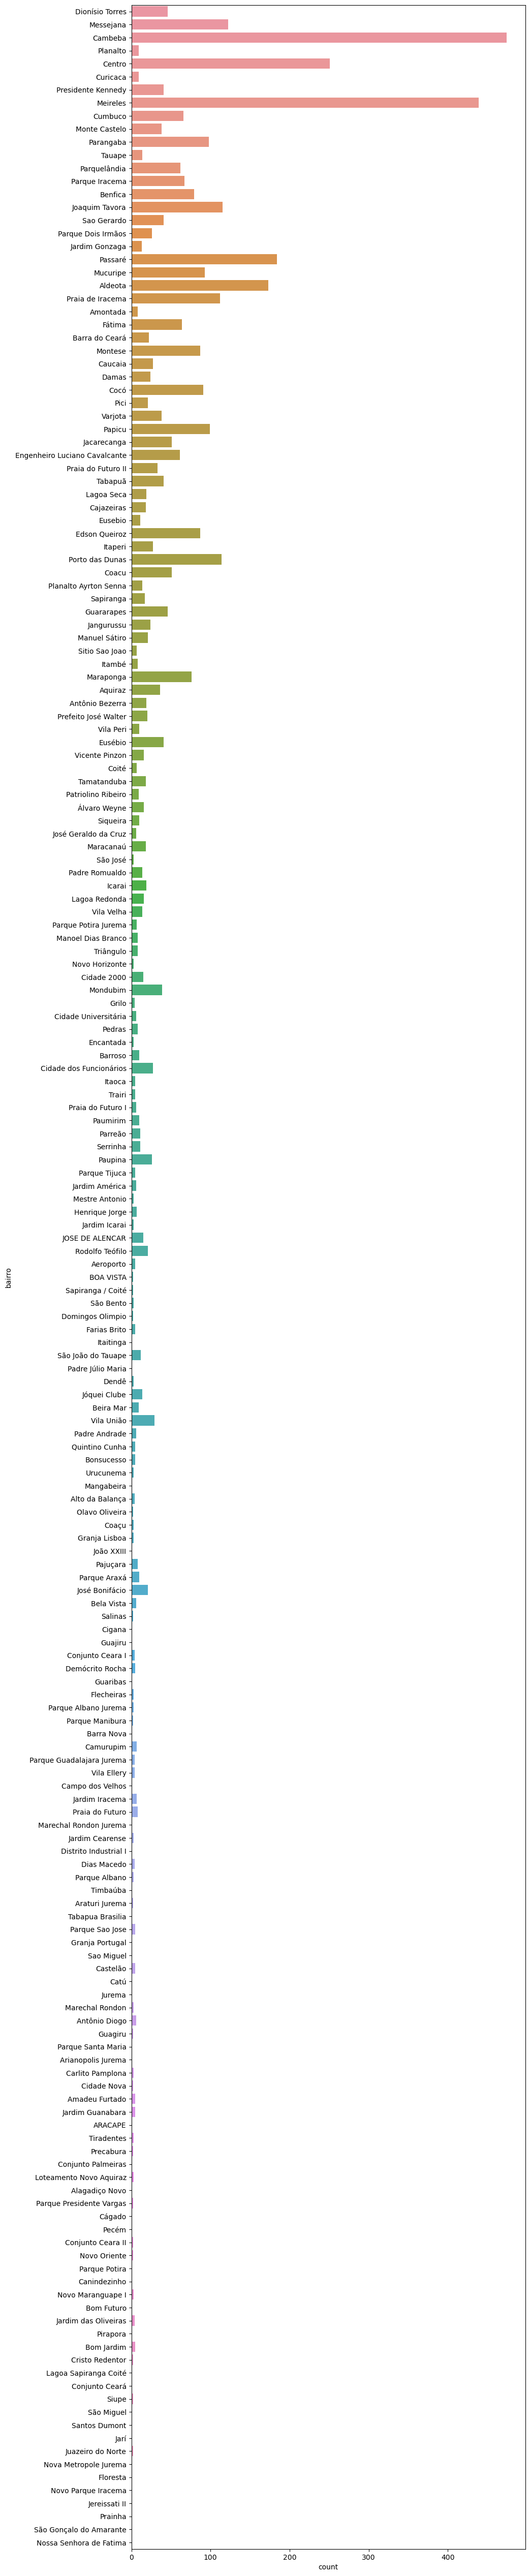

In [97]:
# os bairros que aparecem são cambeba, meireles e centro
plt.figure(figsize=(10, 65))
sns.countplot(y = df["bairro"]);

In [98]:
# plt.figure(figsize=(350,5),facecolor='w') 
# sns.barplot(x = df["bairro"], y = df["aluguel"]);

#### Valor do aluguel por bairro

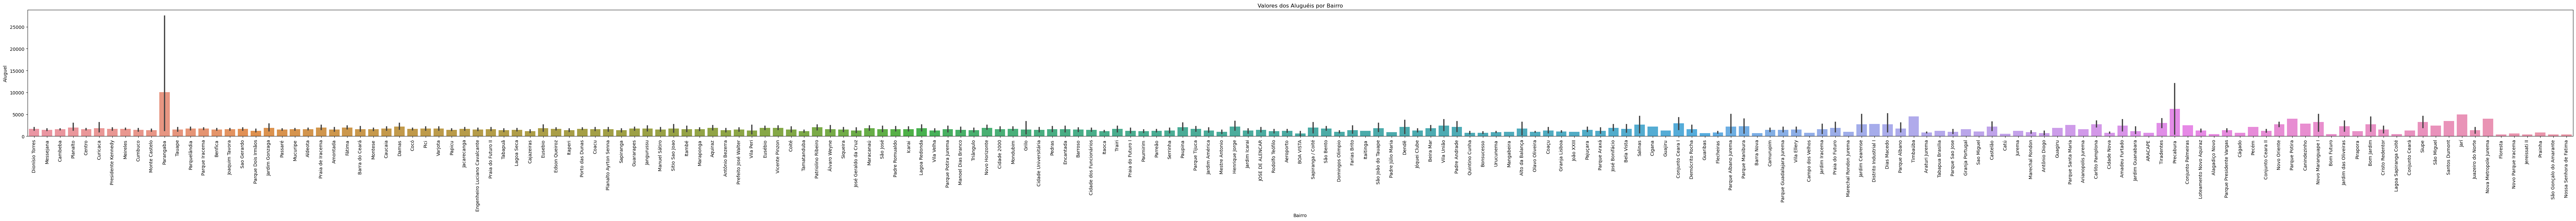

In [99]:
plt.figure(figsize=(100, 5))
sns.barplot(x=df["bairro"], y=df["aluguel"])
plt.xlabel("Bairro")
plt.ylabel("Aluguel")
plt.title("Valores dos Aluguéis por Bairro")
plt.xticks(rotation=90)
plt.show()

#### Os 10 Bairros dos alugueis mais caros

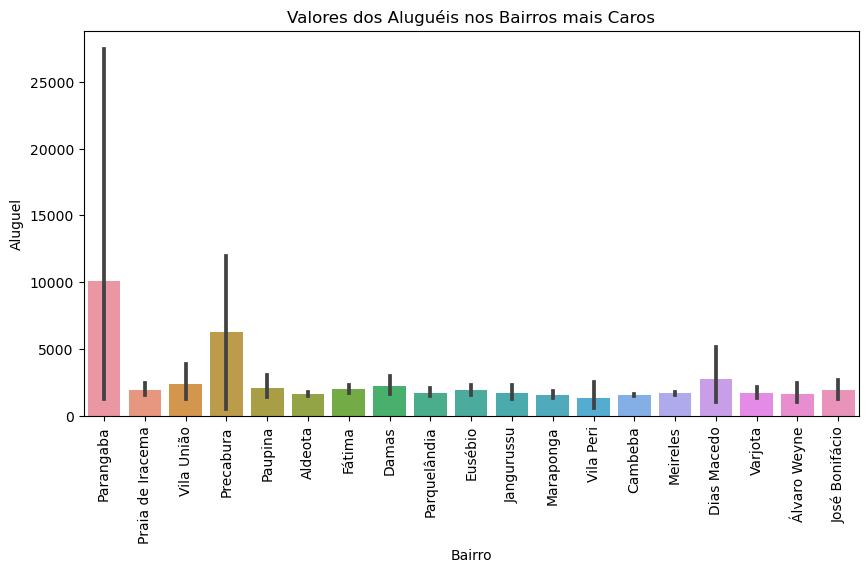

In [25]:
# Ordenar o DataFrame pelos valores dos aluguéis em ordem decrescente
df_sorted = df.sort_values(by="aluguel", ascending=False)

# Selecionar apenas os 10 bairros com os aluguéis mais caros
top_bairros = df_sorted["bairro"].unique()[:20]
df_top_bairros = df_sorted[df_sorted["bairro"].isin(top_bairros)]

plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_bairros["bairro"], y=df_top_bairros["aluguel"])
plt.xlabel("Bairro")
plt.ylabel("Aluguel")
plt.title("Valores dos Aluguéis nos Bairros mais Caros")
plt.xticks(rotation=90)
plt.show()

#### Outlier no bairro parangaba

In [26]:
valor_maximo_parangaba = df.loc[df['bairro'] == 'Parangaba']['aluguel'].max()

print("Valor de aluguel mais caro no bairro Parangaba:", valor_maximo_parangaba)

Valor de aluguel mais caro no bairro Parangaba: 850000


#### Os 10 Bairros dos condominios mais caros

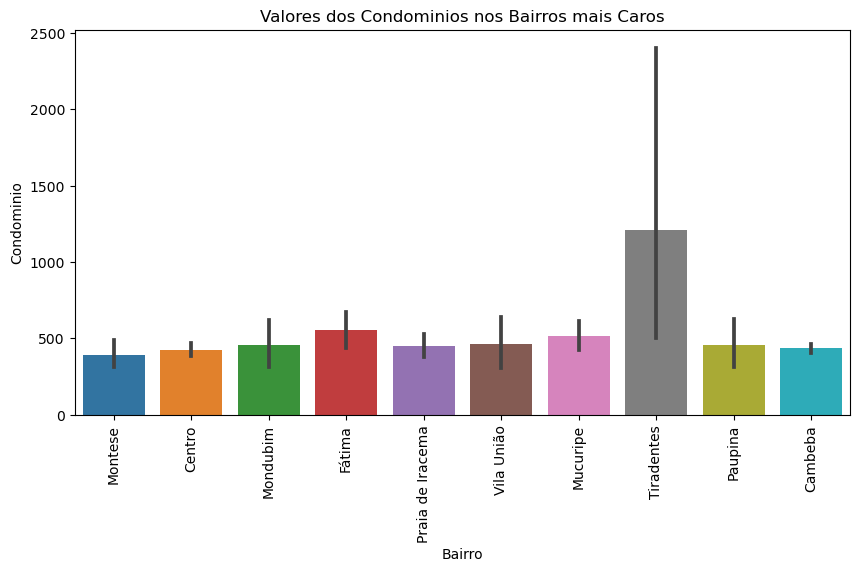

In [101]:
# Ordenar o DataFrame pelos valores dos aluguéis em ordem decrescente
df_sorted = df.sort_values(by="condominio", ascending=False)

# Selecionar apenas os 10 bairros com os aluguéis mais caros
top_bairros = df_sorted["bairro"].unique()[:10]
df_top_bairros = df_sorted[df_sorted["bairro"].isin(top_bairros)]

plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_bairros["bairro"], y=df_top_bairros["condominio"])
plt.xlabel("Bairro")
plt.ylabel("Condominio")
plt.title("Valores dos Condominios nos Bairros mais Caros")
plt.xticks(rotation=90)
plt.show()

#### Maior valor de de condominio do bairro Tiradentes

In [32]:
valor_maximo_tiradentes= df.loc[df['bairro'] == 'Tiradentes']['condominio'].max()

print("Valor de condominio mais caro no bairro Tiradentes:", valor_maximo_tiradentes)

Valor de condominio mais caro no bairro Tiradentes: 2400


#### Os 10 Bairros do IPTU mais caro 

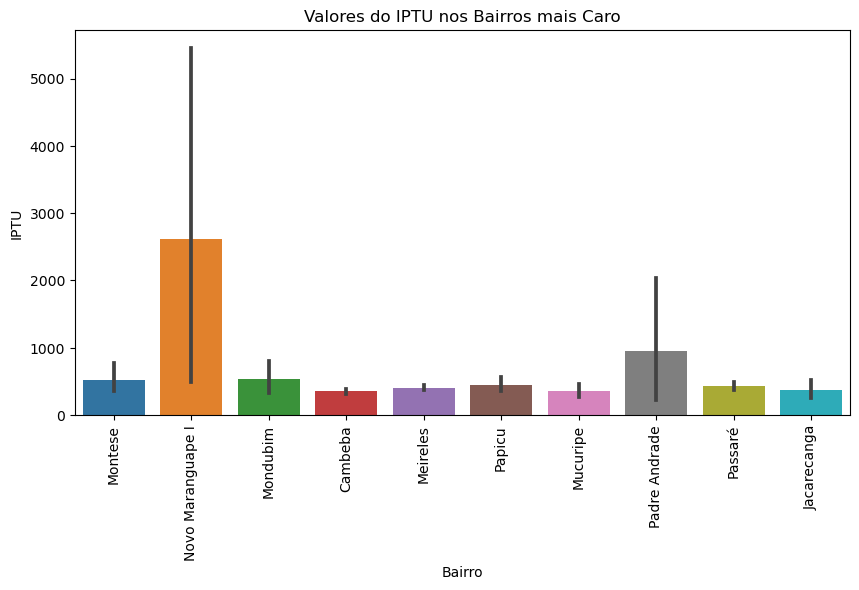

In [102]:
# Ordenar o DataFrame pelos valores dos aluguéis em ordem decrescente
df_sorted = df.sort_values(by="iptu", ascending=False)

# Selecionar apenas os 10 bairros com os aluguéis mais caros
top_bairros = df_sorted["bairro"].unique()[:10]
df_top_bairros = df_sorted[df_sorted["bairro"].isin(top_bairros)]

plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_bairros["bairro"], y=df_top_bairros["iptu"])
plt.xlabel("Bairro")
plt.ylabel("IPTU")
plt.title("Valores do IPTU nos Bairros mais Caro")
plt.xticks(rotation=90)
plt.show()

#### Maior valor de de IPTU do bairro Novo Maranguape I

In [30]:
valor_maximo_nv_maranguape = df.loc[df['bairro'] == 'Novo Maranguape I']['iptu'].max()

print("Valor de iptu mais caro no bairro Novo maranguape i:", valor_maximo_nv_maranguape)

Valor de iptu mais caro no bairro Novo maranguape i: 5450


#### Apartamentos com maior area em m² por bairro

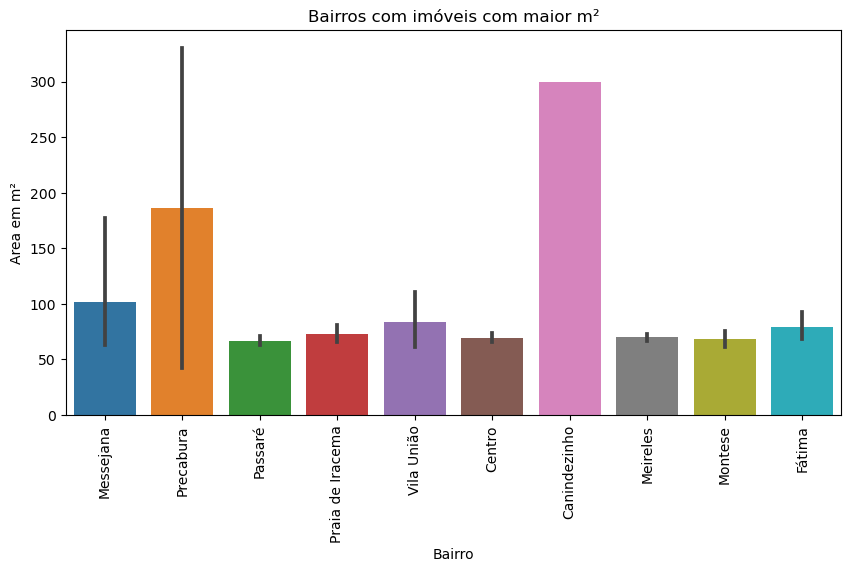

In [34]:
# Ordenar o DataFrame pelos valores dos aluguéis em ordem decrescente
df_sorted = df.sort_values(by="area", ascending=False)

# Selecionar apenas os 10 bairros com os aluguéis mais caros
top_bairros = df_sorted["bairro"].unique()[:10]
df_top_bairros = df_sorted[df_sorted["bairro"].isin(top_bairros)]

plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_bairros["bairro"], y=df_top_bairros["area"])
plt.xlabel("Bairro")
plt.ylabel("Area em m²")
plt.title("Bairros com imóveis com maior m²")
plt.xticks(rotation=90)
plt.show()

#### Imóvel de maior m² do bairro Canindezinho

In [33]:
valor_maximo_canindezinho = df.loc[df['bairro'] == 'Canindezinho']['area'].max()

print("Imóvel de maior m² do bairro Canindezinho:", valor_maximo_canindezinho)

Valor de iptu mais caro no bairro Novo maranguape i: 300.0


#### Quantidade de quartos por valor de alguel

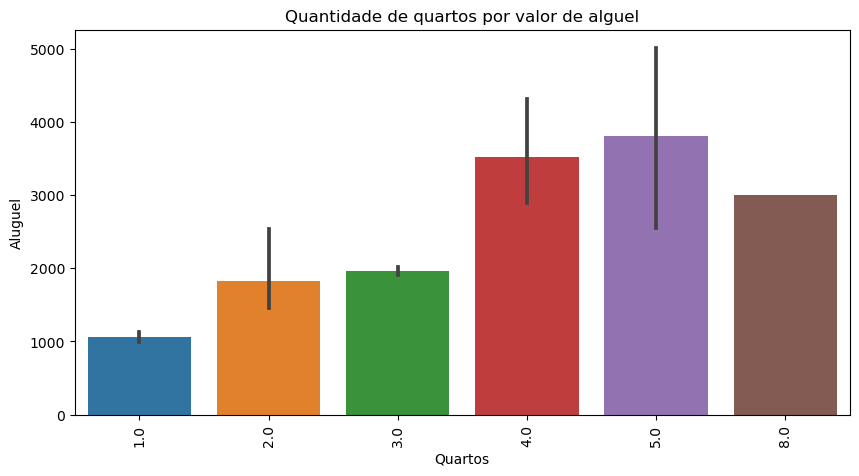

In [104]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["qtd_quartos"], y=df["aluguel"])
plt.xlabel("Quartos")
plt.ylabel("Aluguel")
plt.title("Quantidade de quartos por valor de alguel")
plt.xticks(rotation=90)
plt.show()

#### Quantidade de quartos por quantidade de banheiros

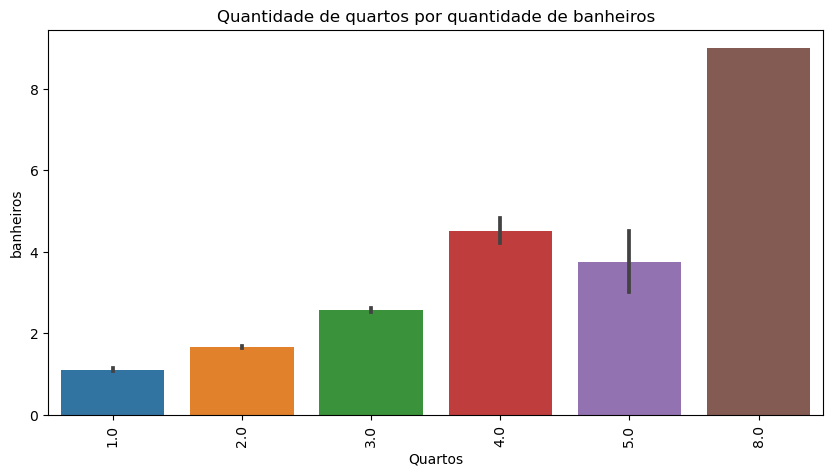

In [105]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["qtd_quartos"], y=df["qtd_banheiros"])
plt.xlabel("Quartos")
plt.ylabel("banheiros")
plt.title("Quantidade de quartos por quantidade de banheiros")
plt.xticks(rotation=90)
plt.show()

#### Quantidade de Vagas de garagem por valor do alguel

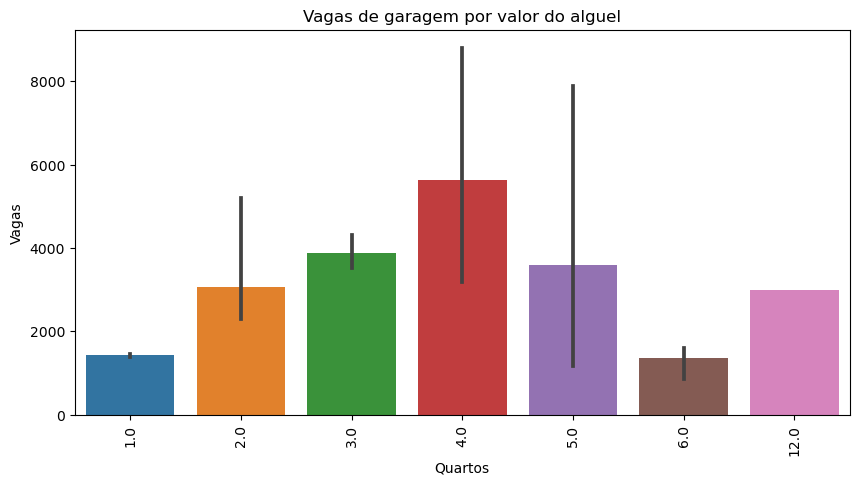

In [106]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["qtd_vagas"], y=df["aluguel"])
plt.xlabel("Quartos")
plt.ylabel("Vagas")
plt.title("Vagas de garagem por valor do alguel")
plt.xticks(rotation=90)
plt.show()

#### Quantidade de Banheiros por valor do alguel

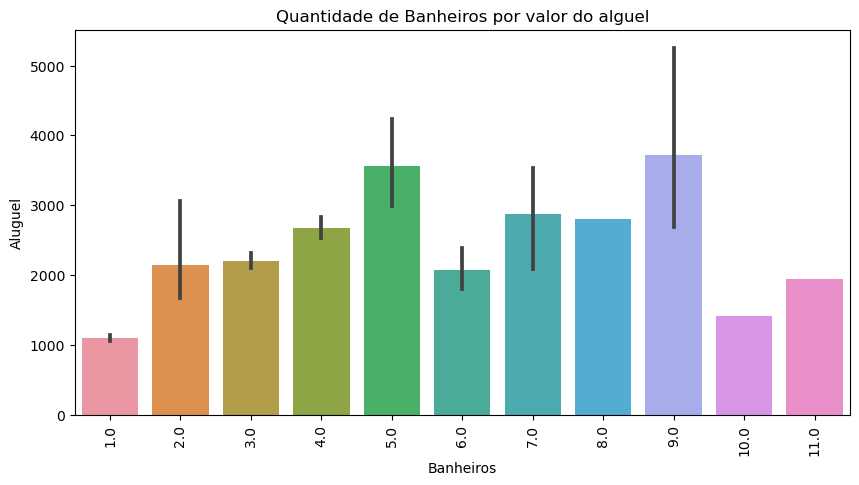

In [107]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["qtd_banheiros"], y=df["aluguel"])
plt.xlabel("Banheiros")
plt.ylabel("Aluguel")
plt.title("Quantidade de Banheiros por valor do alguel")
plt.xticks(rotation=90)
plt.show()

#### Calculando o número ideal de bins k = ⌈1 + 3,3 log10(tamanho_do_dataset)⌉

In [41]:
k = math.ceil(1 + 3.3 * math.log10(df.size))
k

17

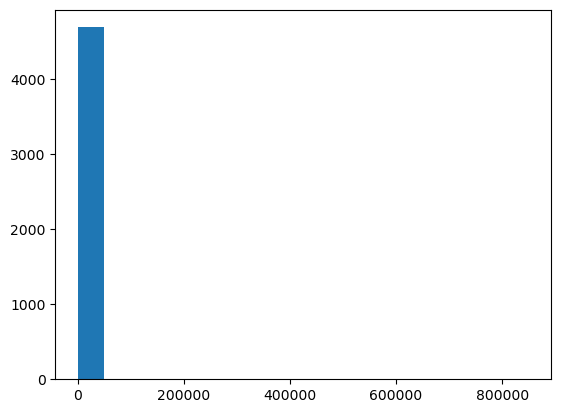

In [42]:
plt.hist(x = df['aluguel'], bins=k)
plt.show()

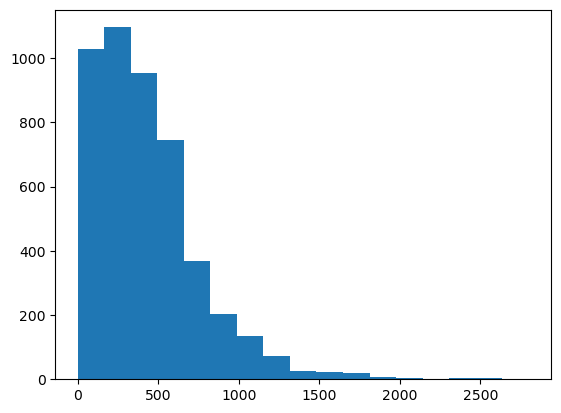

In [111]:
plt.hist(x = df['condominio'], bins=k)
plt.show()

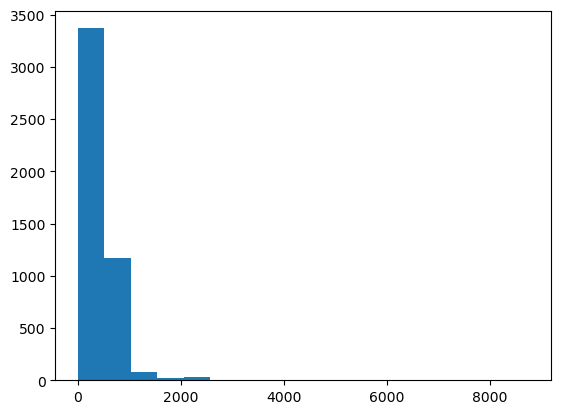

In [112]:
plt.hist(x = df['iptu'], bins=k)
plt.show()

#### Raiz de n

In [113]:
k = int(math.sqrt(df.size))
k

246

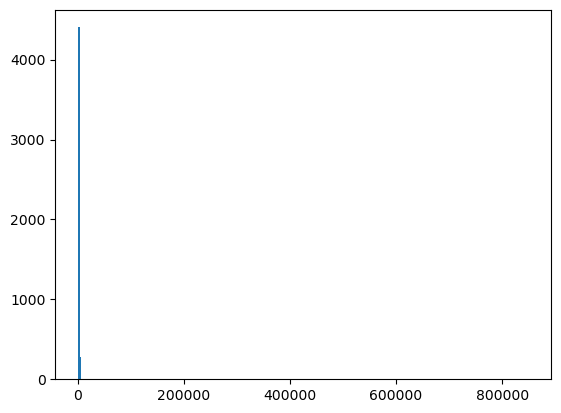

In [114]:
plt.hist(df['aluguel'], bins=k) 
plt.show()

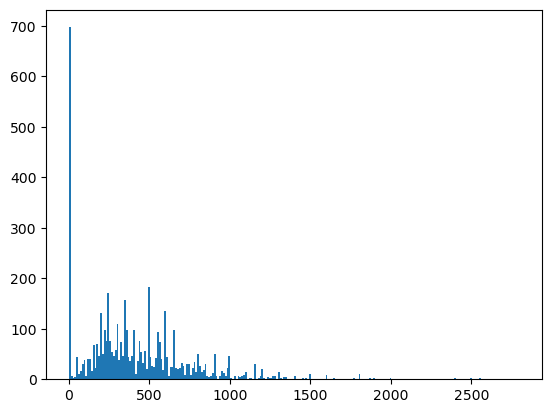

In [115]:
plt.hist(df['condominio'], bins=k) 
plt.show()

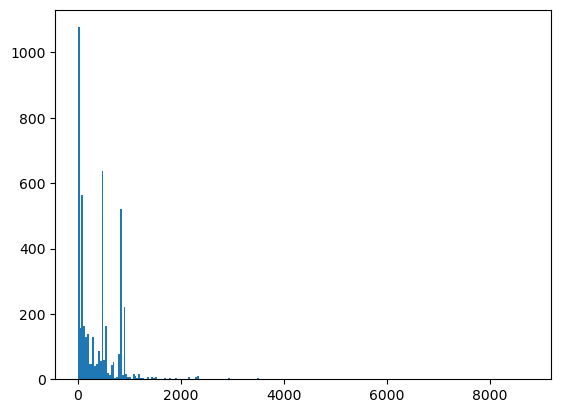

In [116]:
plt.hist(df['iptu'], bins=k) 
plt.show()

### 2.4 - Boxplot:

<Axes: >

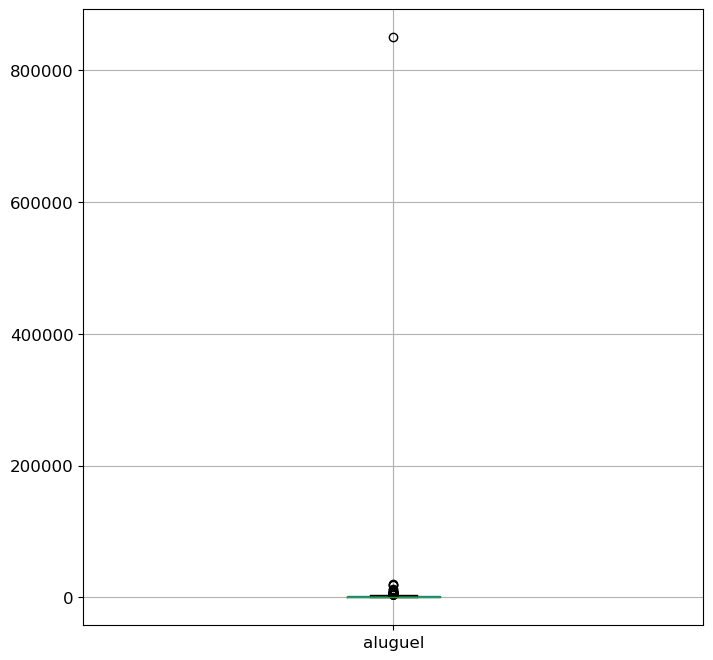

In [47]:
df.boxplot(column=['aluguel'], fontsize='large', figsize=(8,8))

<Axes: >

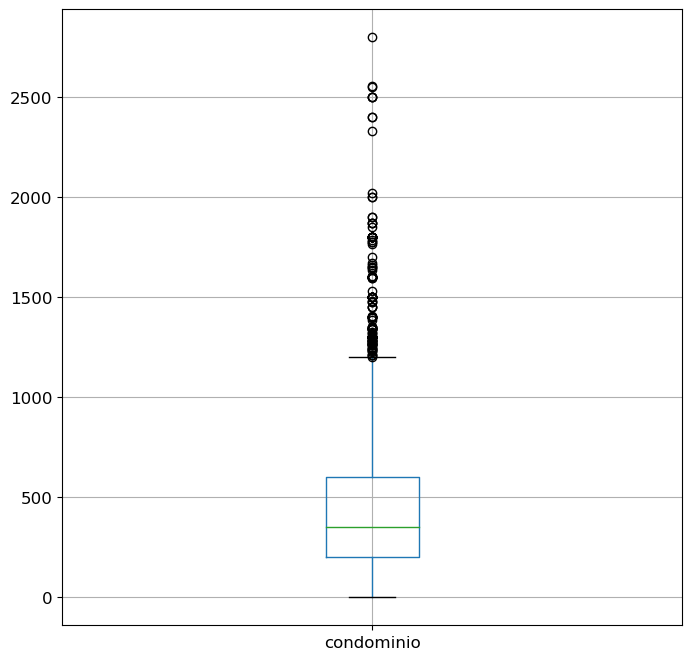

In [48]:
df.boxplot(column=['condominio'], fontsize='large', figsize=(8,8))

<Axes: >

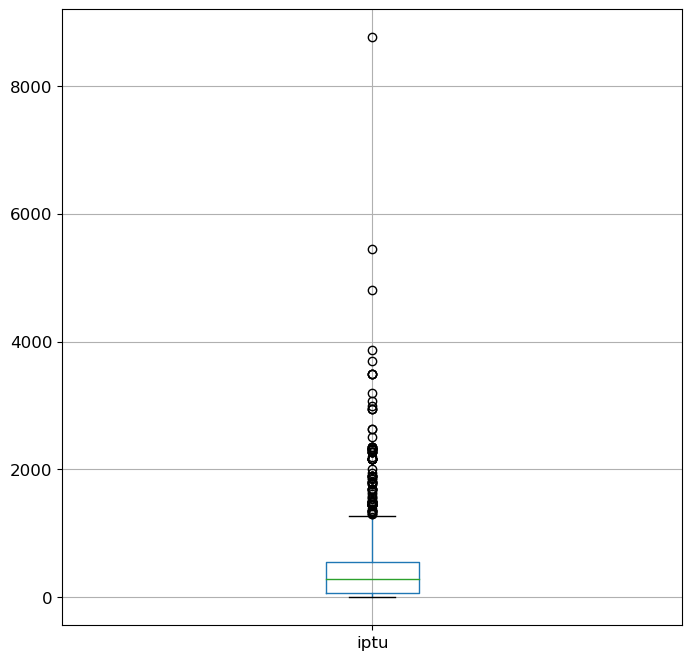

In [49]:
df.boxplot(column=['iptu'], fontsize='large', figsize=(8,8))

<Axes: >

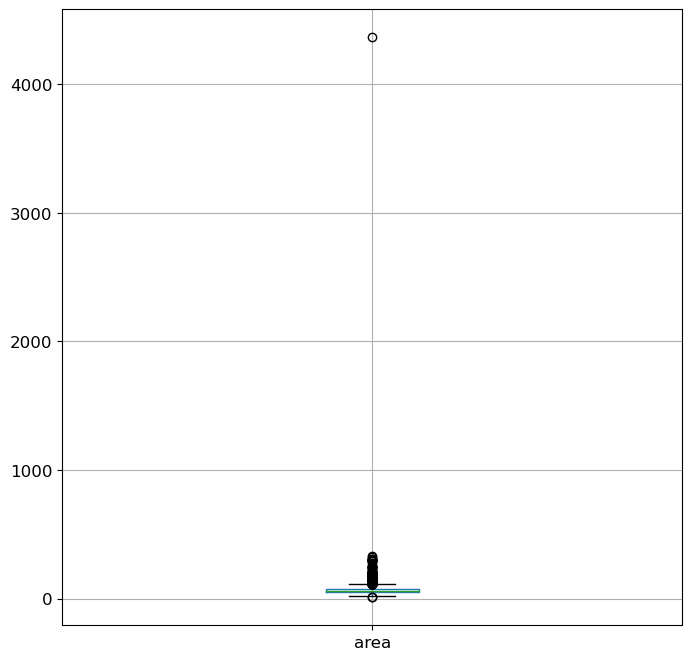

In [50]:
df.boxplot(column=['area'], fontsize='large', figsize=(8,8))

<Axes: >

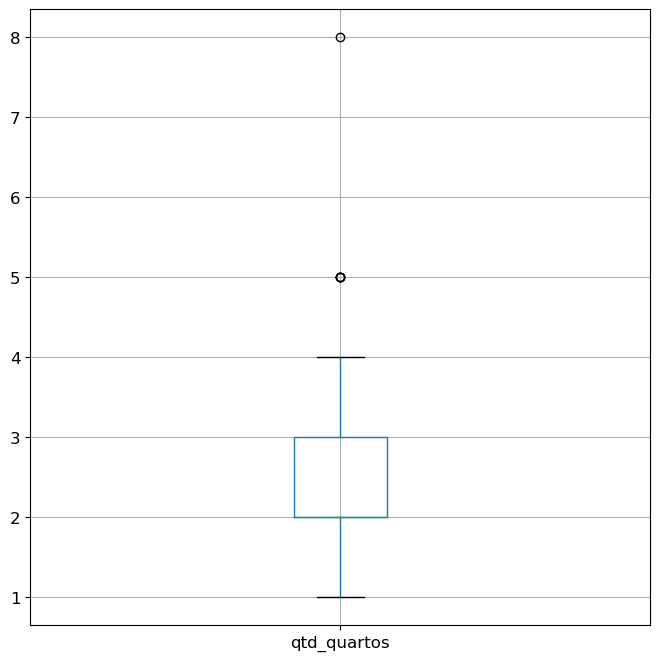

In [51]:
df.boxplot(column=['qtd_quartos'], fontsize='large', figsize=(8,8))

<Axes: >

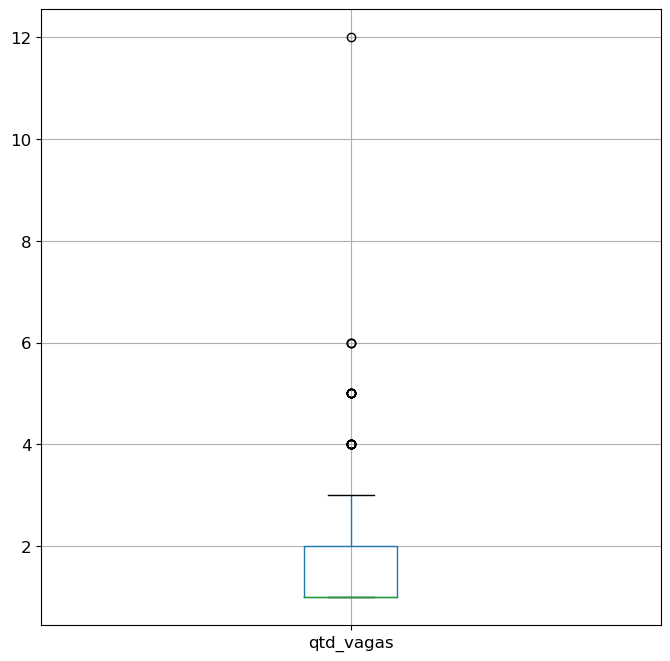

In [52]:
df.boxplot(column=['qtd_vagas'], fontsize='large', figsize=(8,8))

<Axes: >

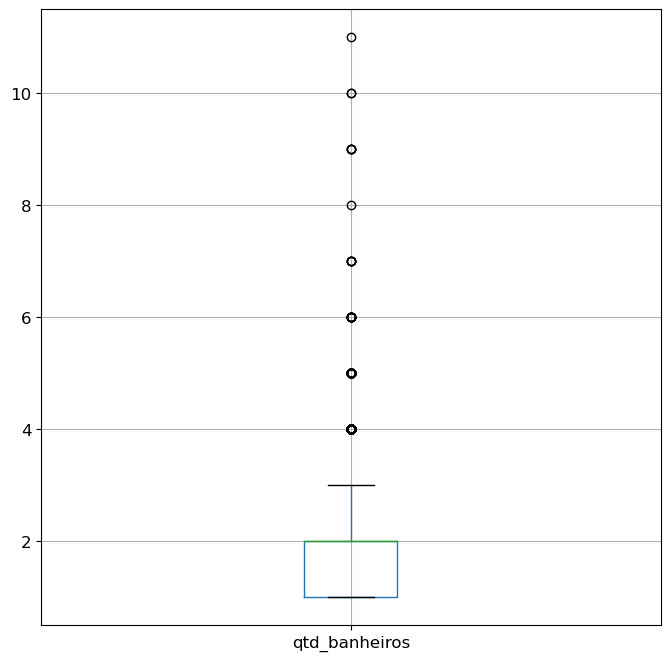

In [53]:
df.boxplot(column=['qtd_banheiros'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'condominio'}, xlabel='aluguel'>

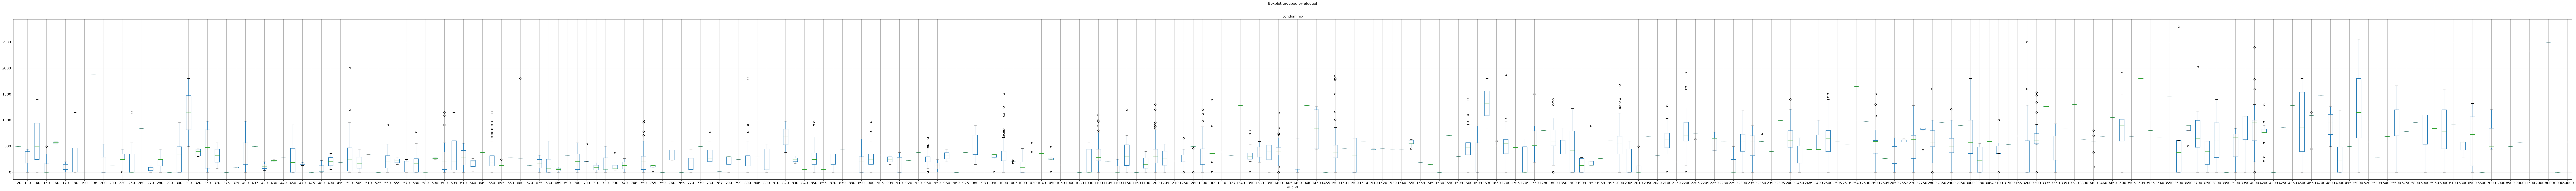

In [55]:
df.boxplot(by='aluguel', column=['condominio'], fontsize='large', figsize=(150,10))

#### Removendo outliers

#### Outlier no valor dos alugueis

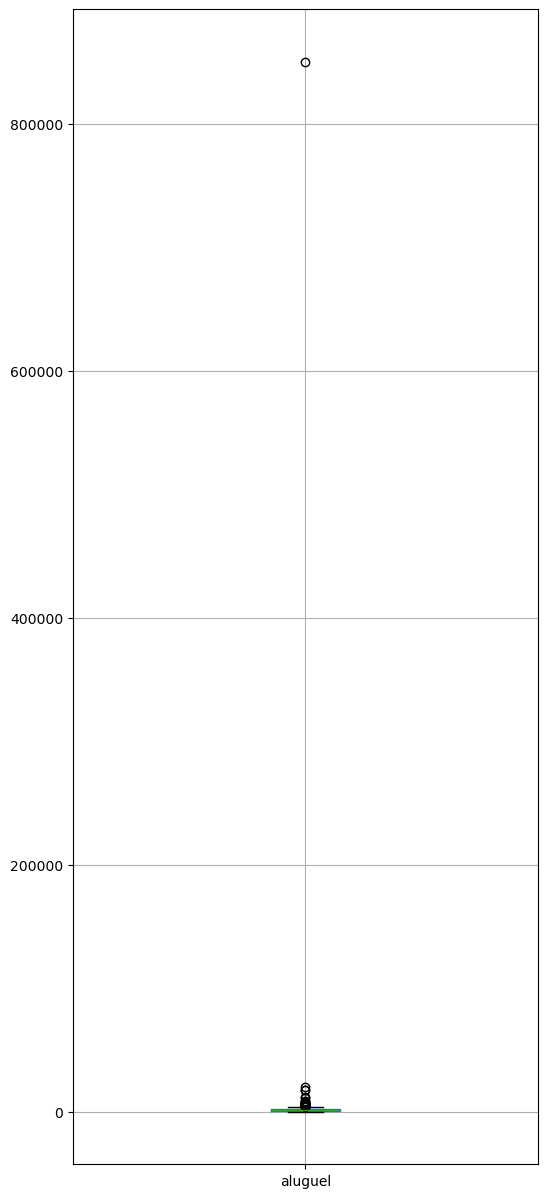

In [56]:
cols_show = ['aluguel']

plt.figure(figsize=(6, 15))
for col in cols_show:
    df.boxplot(column=col);
    plt.show()

#### Procurando o aluguel com o valor de 850000

In [57]:
df.query('aluguel == 850000')

,aluguel,condominio,iptu,descricao,endereco,bairro,area,qtd_quartos,qtd_vagas,qtd_banheiros
4186,850000,583,110,O apartamento no bairro Engenheiro Luciano Cav...,"Rua Chico Feitosa do Cococi, Engenheiro Lucia...",Parangaba,70.0,2.0,2.0,2.0


#### Excluir a linha com aluguel de 850000

In [58]:
df.drop(index=4186, inplace=True)

#### Procurando novamente o aluguel com o valor de 850000

In [59]:
df.query('aluguel == 850000')

,aluguel,condominio,iptu,descricao,endereco,bairro,area,qtd_quartos,qtd_vagas,qtd_banheiros


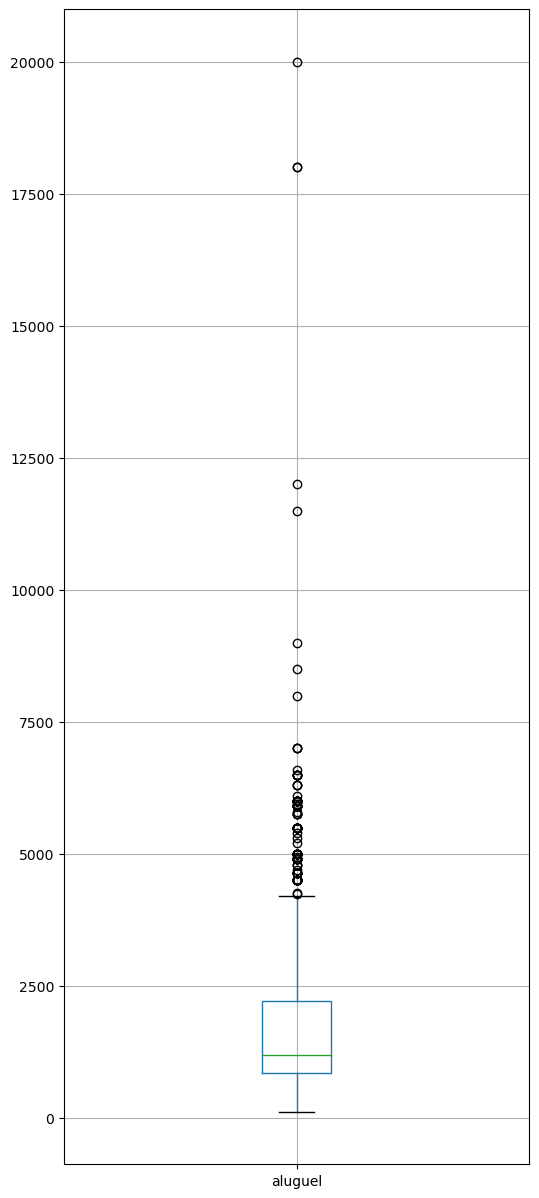

In [132]:
cols_show = ['aluguel']

plt.figure(figsize=(6, 15))
for col in cols_show:
    df.boxplot(column=col);
    plt.show()

#### Outlier no valor da metragem do aartemnto em m²

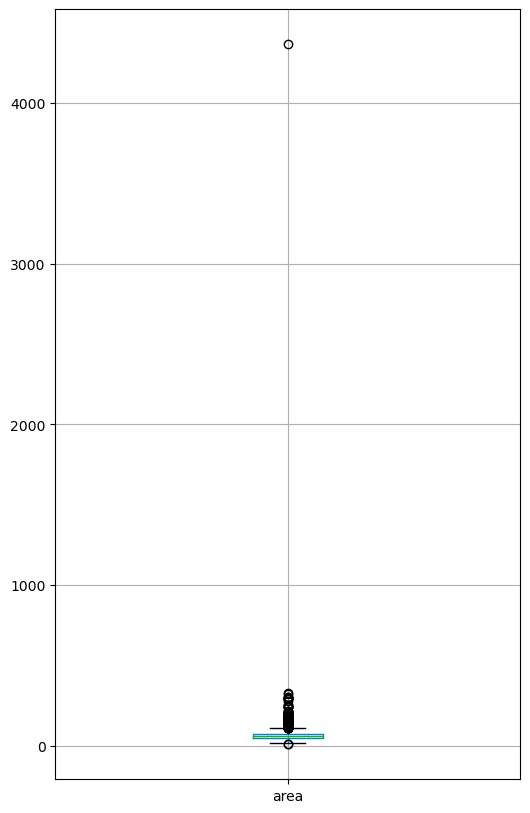

In [60]:
cols_show = ['area']

plt.figure(figsize=(6, 10))
for col in cols_show:
    df.boxplot(column=col);
    plt.show()

#### Procurando o area com o valor de 4365

In [61]:
df.query('area == 4365')

,aluguel,condominio,iptu,descricao,endereco,bairro,area,qtd_quartos,qtd_vagas,qtd_banheiros
2360,1300,200,0,"Apartamento semi mobiliado, dispondo de 43.65m...","Rua Miguel Alves, Centro\n",Messejana,4365.0,2.0,1.0,1.0


#### Excluir a linha com area de 4365

In [62]:
df.drop(index=2360, inplace=True)

#### Procurando o area com o valor de 4365

In [63]:
df.query('area == 4365')

,aluguel,condominio,iptu,descricao,endereco,bairro,area,qtd_quartos,qtd_vagas,qtd_banheiros


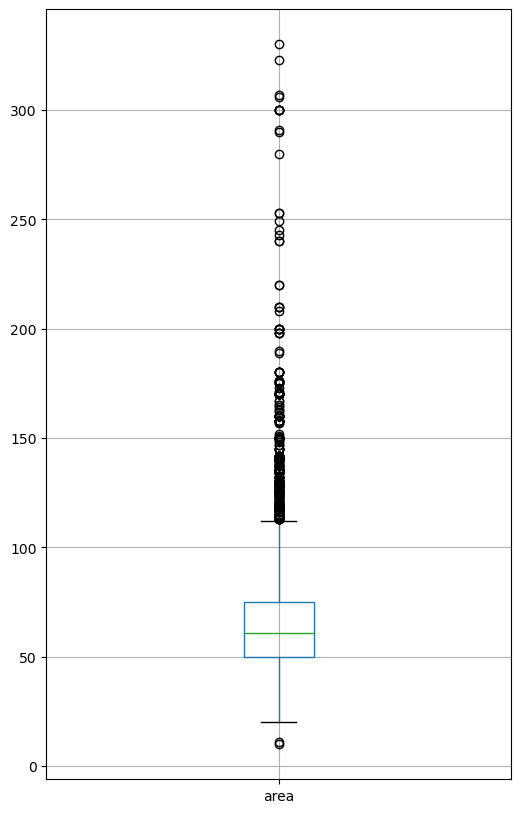

In [148]:
cols_show = ['area']

plt.figure(figsize=(6, 10))
for col in cols_show:
    df.boxplot(column=col);
    plt.show()

### 2.5 - QQ-Plot:

In [64]:
df['aluguel']

z_df_aluguel = stats.zscore(df['aluguel'])
z_df_aluguel

0       0.308571
1      -0.882113
2      -0.718893
3      -0.270041
4       0.464445
          ...   
4685   -1.004527
4686    2.749512
4687   -0.841308
4688   -0.351651
4689    0.056397
Name: aluguel, Length: 4688, dtype: float64

In [65]:
z_df_condominio = stats.zscore(df['condominio'])
z_df_condominio

0      -0.477338
1      -0.373067
2      -0.488924
3      -0.477338
4       0.524823
          ...   
4685    1.414024
4686    1.104107
4687    1.414024
4688   -0.257211
4689    0.206217
Name: condominio, Length: 4688, dtype: float64

In [66]:
z_df_iptu = stats.zscore(df['iptu'])
z_df_iptu

0      -0.448860
1      -0.426139
2      -0.430684
3       1.164300
4      -0.710146
          ...   
4685   -0.789668
4686   -0.426139
4687    0.255477
4688    0.709889
4689    0.709889
Name: iptu, Length: 4688, dtype: float64

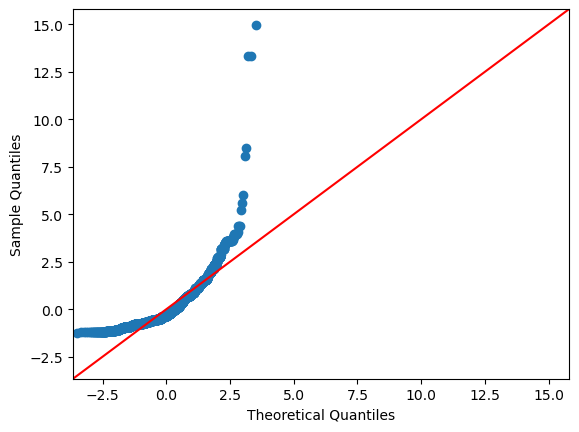

In [67]:
sm.qqplot(z_df_aluguel, line ='45') 
py.show() 

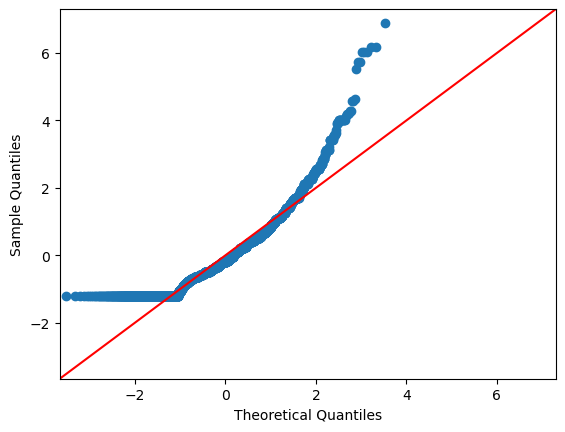

In [68]:
sm.qqplot(z_df_condominio, line ='45') 
py.show() 

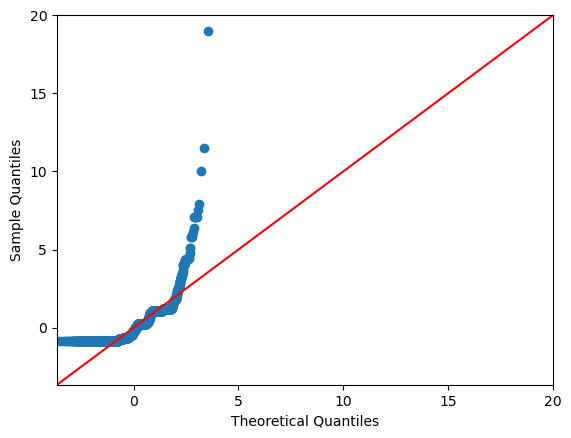

In [69]:
sm.qqplot(z_df_iptu, line ='45') 
py.show() 

### 2.6 - Correlações:

In [70]:
correlation = df.corr()

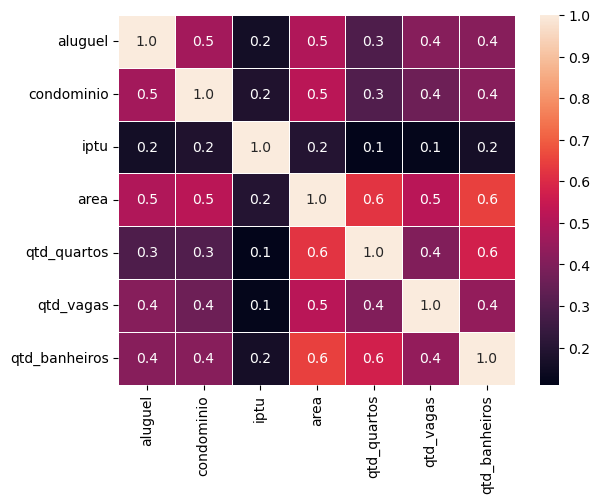

In [71]:
# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6);
plot;

### 2.7 - Teste de Normalidade:

#### Dataframe somente com os dados da coluna 'aluguel'

In [178]:
df3 = df.copy()

aluguel = df3['aluguel']
condominio = df3['condominio']
iptu = df3['iptu']
area = df3['area']
qtd_quartos = df3['qtd_quartos']

df4 = pd.DataFrame(data=aluguel)
df5 = pd.DataFrame(data=condominio)
df6 = pd.DataFrame(data=iptu)
df7 = pd.DataFrame(data=area)
df8 = pd.DataFrame(data=qtd_quartos)

print(df4.head(5), '\n')
print(df5.head(5), '\n')
print(df6.head(5), '\n')
print(df7.head(5), '\n')
print(df8.head(5), '\n')

   aluguel
0     2009
1      550
2      750
3     1300
4     2200 

   condominio
0         254
1         290
2         250
3         254
4         600 

   iptu
0   190
1   200
2   198
3   900
4    75 

   area
0  65.0
1  47.0
2  37.0
3  68.0
4  62.0 

   qtd_quartos
0          2.0
1          2.0
2          1.0
3          3.0
4          2.0 



#### Renomeando coluna 'aluguel' para '0'

In [179]:
df4.rename(columns = {'aluguel': 0}, inplace = True)
df5.rename(columns = {'condominio': 0}, inplace = True)
df6.rename(columns = {'iptu': 0}, inplace = True)
df7.rename(columns = {'area': 0}, inplace = True)
df8.rename(columns = {'qtd_quartos': 0}, inplace = True)

In [215]:
print(df4.head(5), '\n')
print(df5.head(5), '\n')
print(df6.head(5), '\n')
print(df7.head(5), '\n')
print(df8.head(5))

      0
0  2009
1   550
2   750
3  1300
4  2200 

     0
0  254
1  290
2  250
3  254
4  600 

     0
0  190
1  200
2  198
3  900
4   75 

      0
0  65.0
1  47.0
2  37.0
3  68.0
4  62.0 

     0
0  2.0
1  2.0
2  1.0
3  3.0
4  2.0


##### Função automatizada que checa normalidade dos dados

In [159]:
def check_normality(Data_df):
    # Generating absolute frequency
    table_df = Data_df.groupby([0]).size().reset_index(name='Fabs')
    
    # Generating cumulative frequency
    table_df['Fac'] = table_df['Fabs'].cumsum()
    
    # Computing fractionary column: cumulative frequency by element over total cumulative frequency
    table_df['Frac'] = table_df['Fac']/table_df['Fac'].max()
    
    # Computing z-score
    mean = Data_df.mean()
    std = Data_df.std()
    table_df['Zi'] = table_df.iloc[:, 0].apply(lambda x: (x - mean)/std)
    
    import scipy.special as scsp
    def zScoreToPvalue(z):
        # Retornar p-value a partir do z-score
        return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))
    
    # Computing expected value according to p-value
    table_df['FracEsp'] = table_df['Zi'].apply(lambda x: zScoreToPvalue(x))
    
    # Computing D-negative and D-positive
    table_df['D_neg'] = abs(table_df['FracEsp']-table_df['Frac'])
    
    table_df['D_pos'] = 0
    for i in range(table_df['Frac'].shape[0]):
        if i > 0:
            table_df.iloc[i, table_df.columns.get_loc("D_pos")] = table_df['FracEsp'].iloc[i] - table_df['Frac'].iloc[i-1]
        else:
            table_df.iloc[i, table_df.columns.get_loc("D_pos")] = table_df['FracEsp'].iloc[i]
    
    # Retrieving the maximum D
    D = ( table_df[['D_neg','D_pos']].max() ).max()
    
    from scipy.stats import ksone
    def ks_critical_value(n_trials, alpha):
        return ksone.ppf(1-alpha/2, n_trials)
    
    # Retrieving p-value
    p_value = ks_critical_value(Data_df.shape[0], 0.05)
    
    # Computing result
    print(table_df)
    print("\n")
    if D < p_value:
        print('Os dados seguem uma distribuição normal.')
    else:
        print('Os dados não seguem uma distribuição normal.')

#### Verificação de normalidade do valor do aluguel

In [160]:
check_normality(df4)

         0  Fabs   Fac      Frac         Zi   FracEsp     D_neg     D_pos
0      120     1     1  0.000213  -1.232902  0.108806  0.108593  0.108806
1      130     3     4  0.000853  -1.224742  0.110336  0.109483  0.110123
2      140     3     7  0.001493  -1.216582  0.111882  0.110389  0.111028
3      150    16    23  0.004906  -1.208422  0.113443  0.108536  0.111949
4      160     2    25  0.005333  -1.200262  0.115019  0.109686  0.110113
..     ...   ...   ...       ...        ...       ...       ...       ...
264   9000     1  4683  0.998933   6.013251  1.000000  0.001067  0.001280
265  11500     1  4684  0.999147   8.053272  1.000000  0.000853  0.001067
266  12000     1  4685  0.999360   8.461276  1.000000  0.000640  0.000853
267  18000     2  4687  0.999787  13.357326  1.000000  0.000213  0.000640
268  20000     1  4688  1.000000  14.989342  1.000000  0.000000  0.000213

[269 rows x 8 columns]


Os dados não seguem uma distribuição normal.


#### Verificação de normalidade do valor do condominio

In [174]:
check_normality(df5)

        0  Fabs   Fac      Frac        Zi   FracEsp         D_neg     D_pos
0       0   645   645  0.137585 -1.212900  0.112584  2.500126e-02  0.112584
1       1    52   697  0.148677 -1.210004  0.113139  3.553873e-02 -0.024447
2      20     6   703  0.149957 -1.154978  0.124050  2.590753e-02 -0.024628
3      25     1   704  0.150171 -1.140497  0.127040  2.313100e-02 -0.022918
4      30     2   706  0.150597 -1.126016  0.130079  2.051799e-02 -0.020091
..    ...   ...   ...       ...       ...       ...           ...       ...
530  2400     2  4682  0.998720  5.737767  1.000000  1.279859e-03  0.001706
531  2500     3  4685  0.999360  6.027378  1.000000  6.399309e-04  0.001280
532  2550     1  4686  0.999573  6.172184  1.000000  4.266208e-04  0.000640
533  2555     1  4687  0.999787  6.186664  1.000000  2.133103e-04  0.000427
534  2800     1  4688  1.000000  6.896212  1.000000  2.670308e-12  0.000213

[535 rows x 8 columns]


Os dados não seguem uma distribuição normal.


#### Verificação de normalidade do valor do iptu

In [175]:
check_normality(df6)

        0  Fabs   Fac      Frac         Zi   FracEsp     D_neg     D_pos
0       0   870   870  0.185580  -0.880457  0.189306  0.003726  0.189306
1       1   152  1022  0.218003  -0.878185  0.189922  0.028082  0.004341
2      10     1  1023  0.218217  -0.857739  0.195518  0.022698 -0.022485
3      13     2  1025  0.218643  -0.850923  0.197406  0.021237 -0.020811
4      15     1  1026  0.218857  -0.846380  0.198671  0.020186 -0.019973
..    ...   ...   ...       ...        ...       ...       ...       ...
445  3700     1  4684  0.999147   7.525254  1.000000  0.000853  0.001067
446  3862     1  4685  0.999360   7.893288  1.000000  0.000640  0.000853
447  4800     1  4686  0.999573  10.024249  1.000000  0.000427  0.000640
448  5450     1  4687  0.999787  11.500928  1.000000  0.000213  0.000427
449  8761     1  4688  1.000000  19.022903  1.000000  0.000000  0.000213

[450 rows x 8 columns]


Os dados não seguem uma distribuição normal.


#### Verificação de normalidade da area em m²

In [182]:
check_normality(df7)

         0  Fabs   Fac      Frac        Zi   FracEsp     D_neg     D_pos
0     10.0     1     1  0.000215 -1.876434  0.030298  0.030083  0.030298
1     11.0     1     2  0.000430 -1.844195  0.032577  0.032147  0.032362
2     20.0     3     5  0.001076 -1.554047  0.060087  0.059010  0.059656
3     21.0     2     7  0.001507 -1.521809  0.064028  0.062522  0.062952
4     23.0     2     9  0.001937 -1.457332  0.072512  0.070575  0.071006
..     ...   ...   ...       ...       ...       ...       ...       ...
158  300.0     5  4642  0.999139  7.472776  1.000000  0.000861  0.001937
159  306.0     1  4643  0.999354  7.666208  1.000000  0.000646  0.000861
160  307.0     1  4644  0.999570  7.698446  1.000000  0.000430  0.000646
161  323.0     1  4645  0.999785  8.214265  1.000000  0.000215  0.000430
162  330.0     1  4646  1.000000  8.439935  1.000000  0.000000  0.000215

[163 rows x 8 columns]


Os dados não seguem uma distribuição normal.


#### Verificação de normalidade da quantidade de quartos

In [181]:
check_normality(df8)

     0  Fabs   Fac      Frac        Zi   FracEsp     D_neg     D_pos
0  1.0   542   542  0.115664 -1.838347  0.033006  0.082658  0.033006
1  2.0  2495  3037  0.648101 -0.374293  0.354093  0.294008  0.238430
2  3.0  1566  4603  0.982288  1.089761  0.862091  0.120197  0.213990
3  4.0    78  4681  0.998933  2.553815  0.994673  0.004260  0.012385
4  5.0     4  4685  0.999787  4.017868  0.999971  0.000184  0.001038
5  8.0     1  4686  1.000000  8.410030  1.000000  0.000000  0.000213


Os dados não seguem uma distribuição normal.


### 2.8 - Best Fit Distribution:

In [183]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [184]:
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

#### Coluna 'aluguel'

In [185]:
df4.head(5)

,0
0,2009
1,550
2,750
3,1300
4,2200


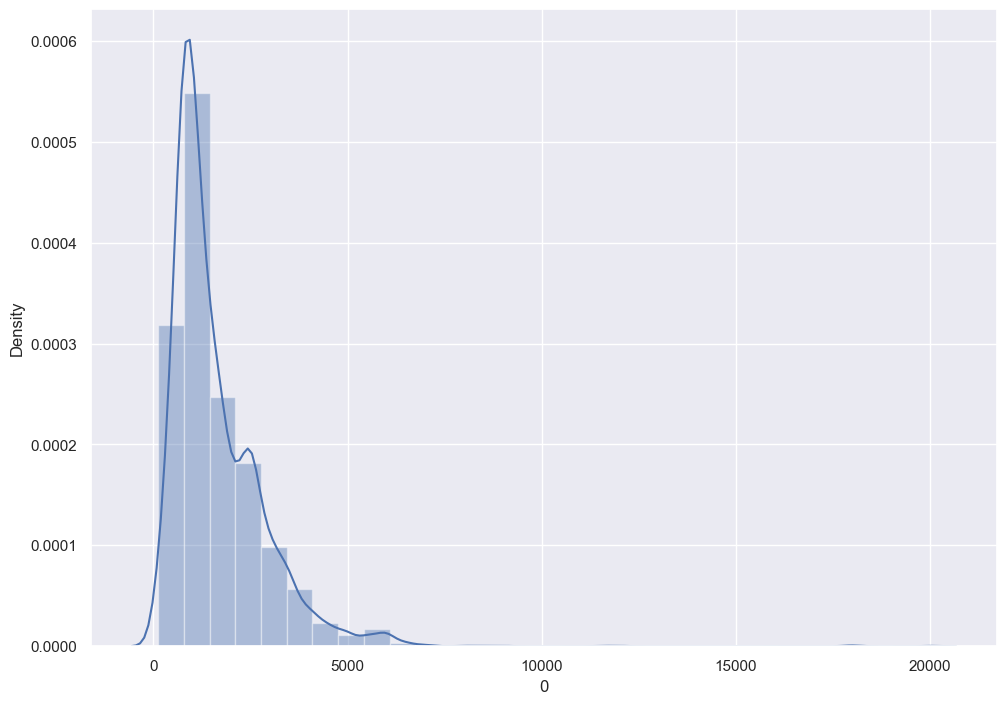

In [186]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df4[0], bins=30) 
plt.show()

In [199]:
y_std = scipy.stats.zscore(df4[0])
y_std = y_std.values.flatten()
y_std

array([ 0.30857055, -0.88211252, -0.71889346, ..., -0.84130775,
       -0.35165056,  0.0563971 ])

In [200]:
check_distribution(dist_names, y_std);


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.060750   1.754786e-15  no
0          beta  0.075828   6.869356e-24  no
5      pearson3  0.075949   5.782197e-24  no
2         gamma  0.075949   5.780771e-24  no
9   weibull_min  0.080398   8.333347e-27  no
10  weibull_max  0.107911   5.388498e-48  no
6             t  0.113363   6.183033e-53  no
4          norm  0.148728   2.761578e-91  no
1         expon  0.186397  4.618779e-143  no
7        triang  0.534161   0.000000e+00  no
8       uniform  0.768849   0.000000e+00  no


#### Coluna 'condominio'

In [189]:
df5.head(5)

,0
0,254
1,290
2,250
3,254
4,600


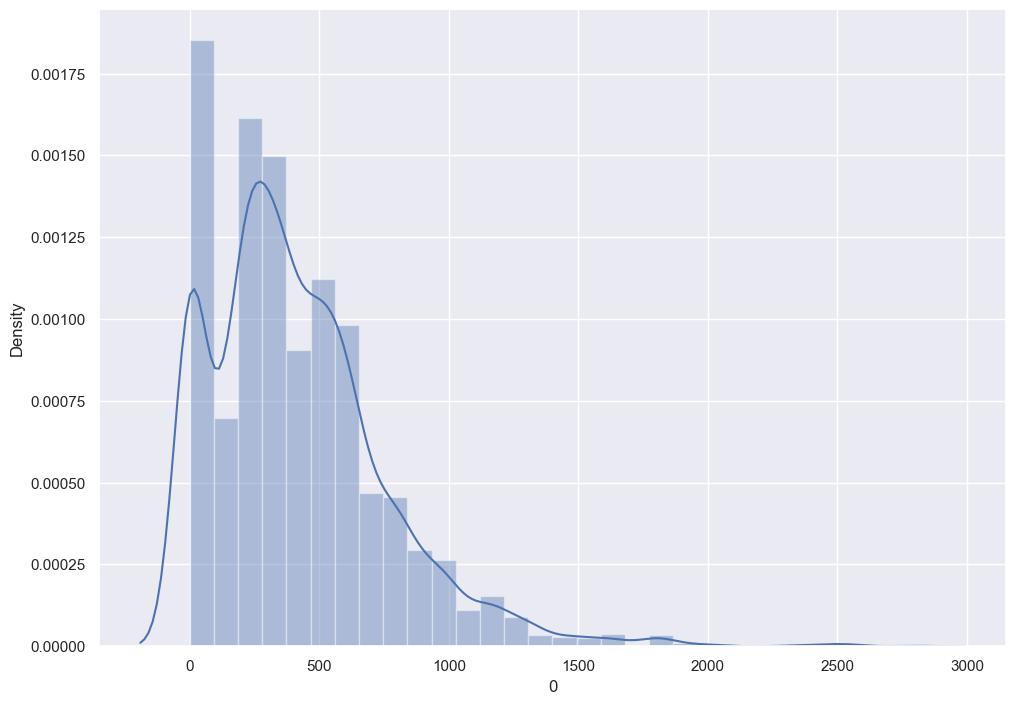

In [190]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df5[0], bins=30) 
plt.show()

In [197]:
y_std = scipy.stats.zscore(df5[0])
y_std = y_std.values.flatten()
y_std

array([-0.47733845, -0.37306732, -0.48892413, ...,  1.41402392,
       -0.25721051,  0.20621671])

In [198]:
check_distribution(dist_names, y_std);


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.086349   3.670294e-31  no
10  weibull_max  0.090092   1.467170e-33  no
3       lognorm  0.101689   1.173852e-42  no
6             t  0.108541   1.489058e-48  no
1         expon  0.146293   4.983333e-88  no
9   weibull_min  0.168506  7.894571e-117  no
0          beta  0.266054  1.949994e-293  no
2         gamma  0.556329   0.000000e+00  no
5      pearson3  0.361559   0.000000e+00  no
7        triang  0.384299   0.000000e+00  no
8       uniform  0.601292   0.000000e+00  no


#### Coluna 'iptu'

In [201]:
df6.head(5)

,0
0,190
1,200
2,198
3,900
4,75


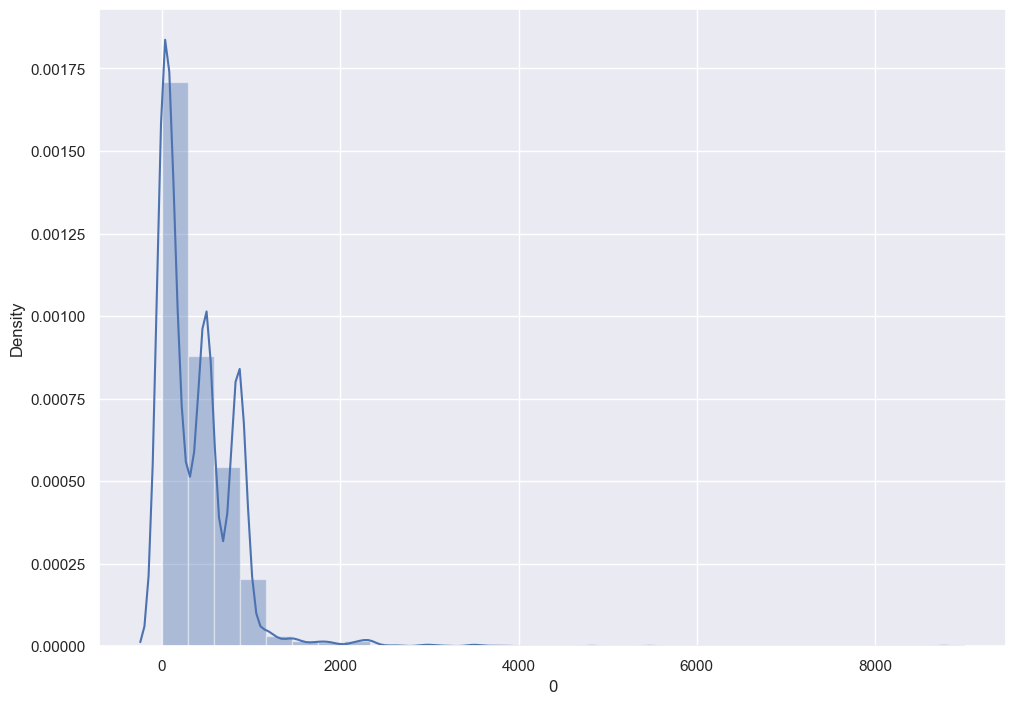

In [202]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df6[0], bins=30) 
plt.show()

In [203]:
y_std = scipy.stats.zscore(df6[0])
y_std = y_std.values.flatten()
y_std

array([-0.44885999, -0.42613943, -0.43068354, ...,  0.25547739,
        0.7098886 ,  0.7098886 ])

In [204]:
check_distribution(dist_names, y_std);


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.133640   8.900413e-74  no
10  weibull_max  0.155530   1.681941e-99  no
0          beta  0.167769  8.295012e-116  no
6             t  0.171627  3.286612e-121  no
5      pearson3  0.185579  8.388086e-142  no
1         expon  0.215426  1.883968e-191  no
2         gamma  0.514012   0.000000e+00  no
3       lognorm  0.286581   0.000000e+00  no
7        triang  0.641605   0.000000e+00  no
8       uniform  0.859089   0.000000e+00  no
9   weibull_min  0.294497   0.000000e+00  no


#### Coluna 'area'

In [208]:
df7.head(5)

,0
0,65.0
1,47.0
2,37.0
3,68.0
4,62.0


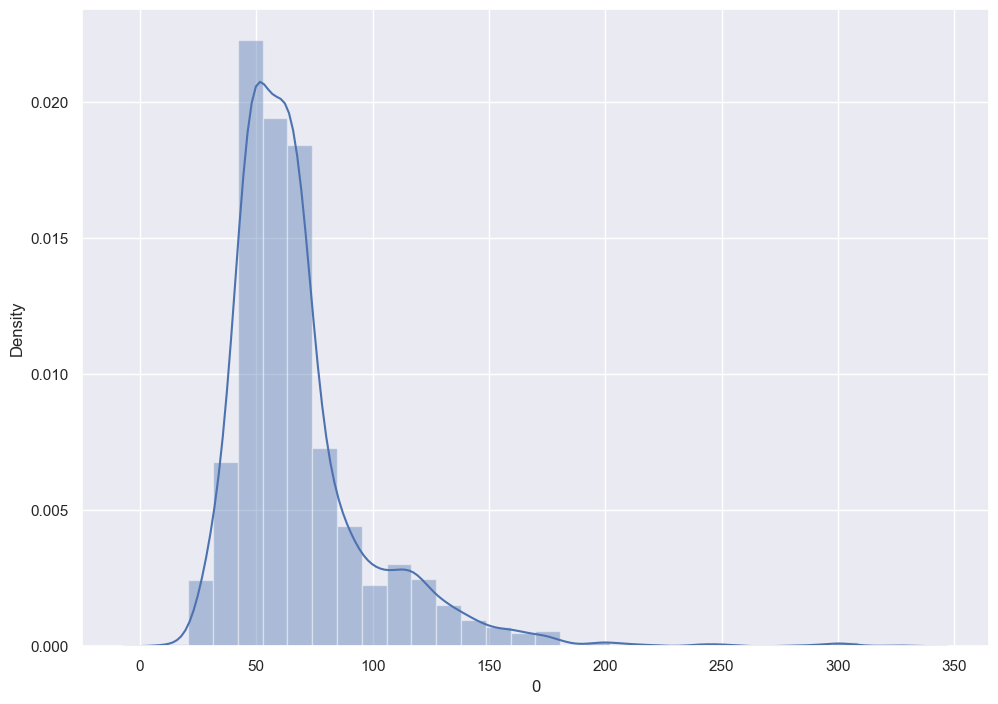

In [209]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df7[0], bins=30) 
plt.show()

#### Coluna 'qtd_quartos

In [220]:
df8.head(5)

,0
0,2.0
1,2.0
2,1.0
3,3.0
4,2.0


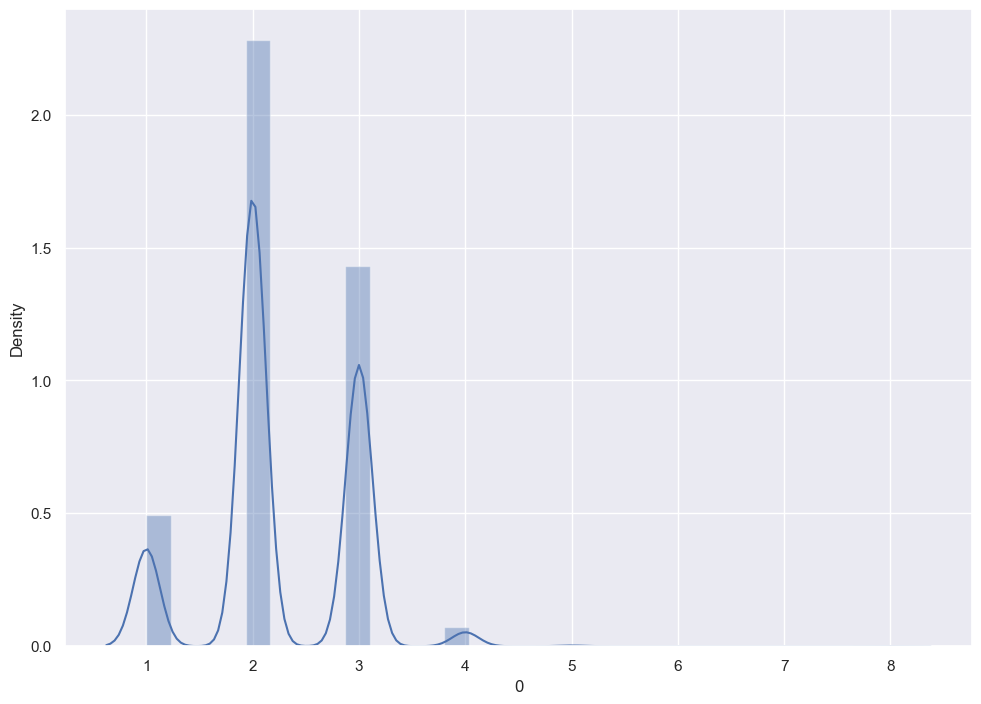

In [222]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df8[0], bins=30) 
plt.show()

#### Plotando novamente os dados após a remossão dos outiliers

#### Os 10 Bairros dos alugueis mais caros

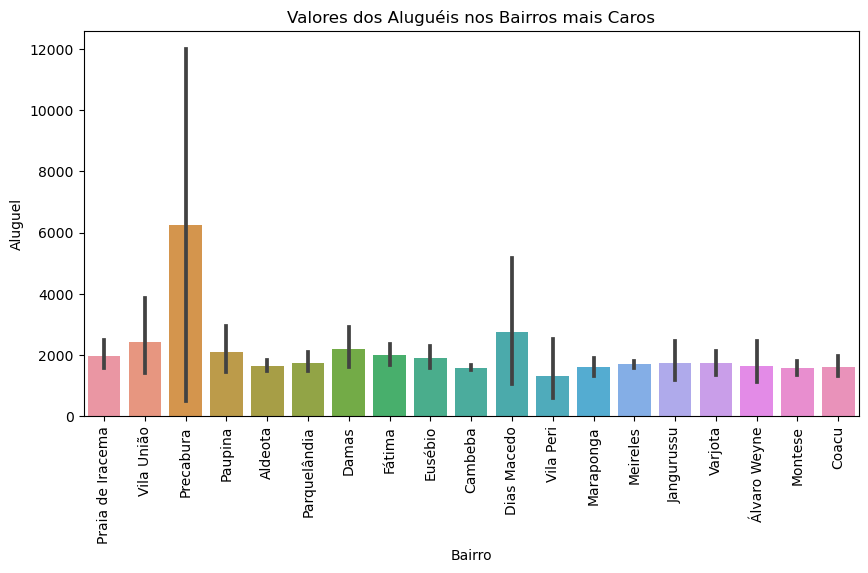

In [72]:
# Ordenar o DataFrame pelos valores dos aluguéis em ordem decrescente
df_sorted = df.sort_values(by="aluguel", ascending=False)

# Selecionar apenas os 10 bairros com os aluguéis mais caros
top_bairros = df_sorted["bairro"].unique()[:20]
df_top_bairros = df_sorted[df_sorted["bairro"].isin(top_bairros)]

plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_bairros["bairro"], y=df_top_bairros["aluguel"])
plt.xlabel("Bairro")
plt.ylabel("Aluguel")
plt.title("Valores dos Aluguéis nos Bairros mais Caros")
plt.xticks(rotation=90)
plt.show()

#### Calculando o número ideal de bins k = ⌈1 + 3,3 log10(tamanho_do_dataset)⌉

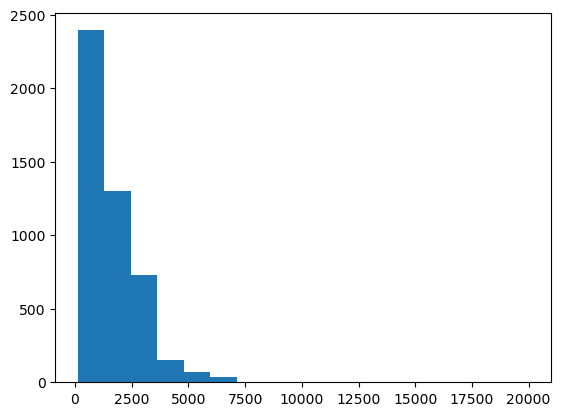

In [73]:
plt.hist(x = df['aluguel'], bins=k)
plt.show()

#### Raiz de n

In [45]:
k_ = int(math.sqrt(df.size))
k_

216

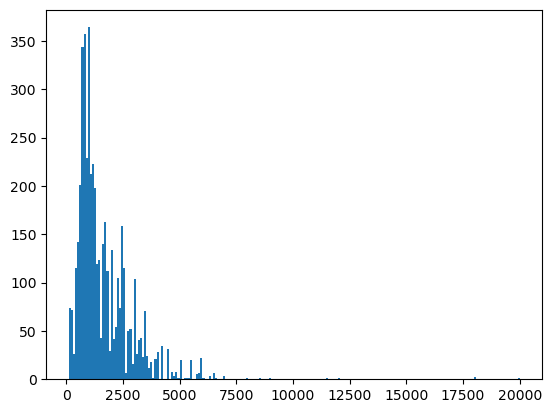

In [74]:
plt.hist(df['aluguel'], bins=k_) 
plt.show()

##### Exportando dataset

In [75]:
df.to_csv('imoveis_aluguel.csv', index=False, encoding='utf-8')